## Loading Dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
# Read the data
portfolio = pd.read_csv('portfolio.csv')
profile = pd.read_csv('profile.csv')
transcript = pd.read_csv('transcript.csv')

Checking length of datasets, null values, unique users etc

In [3]:
print(f"transcript :{len(transcript)} ,profile :{len(profile)} ,portfolio :{len(portfolio)}")

transcript :306534 ,profile :17000 ,portfolio :10


In [4]:
ids_with_nan_gender = profile.loc[profile['gender'].isna(), 'id']


In [5]:
ids_with_nan_income = profile.loc[profile['income'].isna(), 'id']


In [6]:
# no null values for age

# around 12 % of profiles has nan values

## EDA

Distribution of Age, income, joining year,

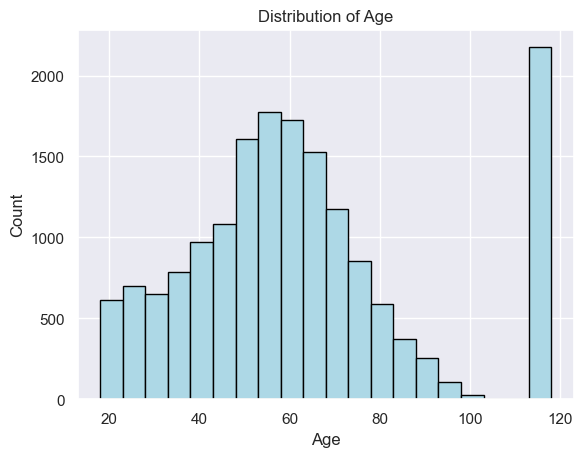

In [7]:
# plot the distribution of age
plt.hist(profile['age'], bins=20, color='lightBlue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [8]:
profile['age'].describe()

count    17000.000000
mean        62.531412
std         26.738580
min         18.000000
25%         45.000000
50%         58.000000
75%         73.000000
max        118.000000
Name: age, dtype: float64

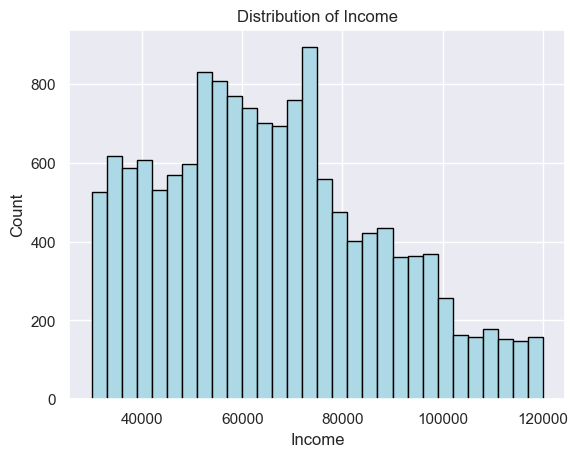

In [9]:
# PLOT THE DISTRIBUTION OF INCOME
plt.hist(profile['income'], bins=30, color='lightBlue', edgecolor='black')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()


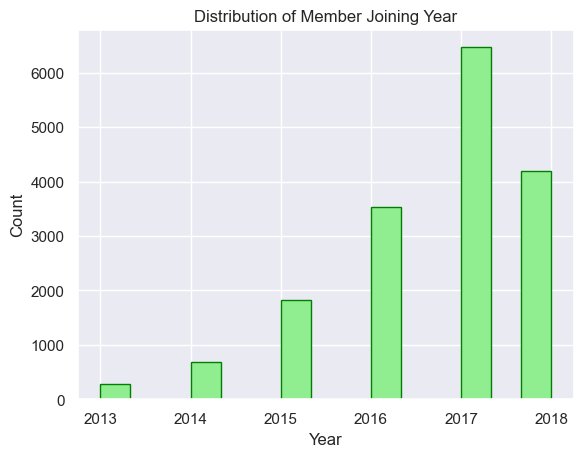

In [10]:
# plot the distribution of member joining year
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')
profile['member_year'] = profile['became_member_on'].dt.year
plt.hist(profile['member_year'], bins=15, color='lightGreen', edgecolor='green')
plt.title('Distribution of Member Joining Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


In [11]:
profile.duplicated('id').any()

False

Merging profile and transcript datasets

In [12]:
# Verify matching set of customer IDs 
if len(set(profile['id']) ^ set(transcript['person'])) == 0:
    print("The dataframes profile and transcript are comprised of the same individuals.")
else:
    print("The people in profile and those in transcript do not match.")

The dataframes profile and transcript are comprised of the same individuals.


In [13]:
profile_transcript_merged = pd.merge(profile, transcript, left_on='id', right_on='person', how='right')


In [14]:
len(profile_transcript_merged['id'].unique())

17000

In [15]:
profile_transcript_merged

,Unnamed: 0_x,gender,age,id,became_member_on,income,member_year,Unnamed: 0_y,person,event,value,time
0,3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,2017,0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,4,NaN,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,2017,1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,2018,2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,6,NaN,118,8ec6ce2a7e7949b1bf142def7d0e0586,2017-09-25,NaN,2017,3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,7,NaN,118,68617ca6246f4fbc85e91a2a49552598,2017-10-02,NaN,2017,4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...,...,...,...,...,...,...,...,...
306529,16959,M,66,b3a1272bc9904337b331bf348c3e8c17,2018-01-01,47000.0,2018,306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,16964,M,52,68213b08d99a4ae1b0dcb72aebd9aa35,2018-04-08,62000.0,2018,306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,16979,F,63,a00058cf10334a308c68e7631c529907,2013-09-22,52000.0,2013,306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,16987,M,57,76ddbd6576844afe811f1a3c0fbb5bec,2016-07-09,40000.0,2016,306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [16]:
len(profile_transcript_merged)

306534

So we have 17000 unique user and 306534 transactions, indicating each user has participated in multiple transactions

In [17]:
if profile_transcript_merged['id'].equals(profile_transcript_merged['person']):
    profile_transcript_merged.drop('person', axis=1, inplace=True)
    profile_transcript_merged.drop('Unnamed: 0_x', axis=1, inplace=True)
    profile_transcript_merged.drop('Unnamed: 0_y', axis=1, inplace=True)
    profile_transcript_merged.reset_index(drop=True, inplace=True)

Removed unnecessary columns

In [18]:
len(profile_transcript_merged['value'].unique())

5121

In [19]:
profile_transcript_merged['event'].unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

In [20]:
# Verify matching set of customer IDs 
if len(set(profile['id']) ^ set(transcript['person'])) == 0:
    print("The dataframes profile and transcript are comprised of the same individuals.")
else:
    print("The people in profile and those in transcript do not match.")

The dataframes profile and transcript are comprised of the same individuals.


In [21]:
dfc = profile_transcript_merged.copy()

l = dfc['value'].tolist()

# Initialize an empty list 
value_list = []

# Create list of all dictionaries in 'value' 
for element in l:
    value_dict = eval(element)
    value_list.append(value_dict)

# Initialize an empty set 
unique_keys = set()

# Create a set of all unique keys in 'value'
for dictionary in value_list:
    for key in dictionary.keys():
        unique_keys.add(key)

unique_keys

{'amount', 'offer id', 'offer_id', 'reward'}

In [22]:
# offer id is for offer received and offer viewed
# amount is for transaction
# offer_id and reward is for offer completed

Seperating transaction, offer completed, recieved and viewed

In [23]:
keys = []
values = []

In [24]:
for l in value_list:
    for k, v in l.items():
        keys.append(k)
        values.append(v)
        
    

In [25]:
df_keys_values = pd.DataFrame({'offer_id_or_amount': keys, 'values': values})


In [26]:
print(f"\n{df_keys_values.shape}")
df_keys_values.tail(10)


(340113, 2)


,offer_id_or_amount,values
340103,amount,43.58
340104,amount,22.64
340105,offer_id,fafdcd668e3743c1bb461111dcafc2a4
340106,reward,2
340107,amount,2.2
340108,amount,1.59
340109,amount,9.53
340110,amount,3.61
340111,amount,3.53
340112,amount,4.05


In [27]:
df_amount = df_keys_values[df_keys_values['offer_id_or_amount'] == 'reward']
print(df_amount.shape)
df_amount.sample(3)

(33579, 2)


,offer_id_or_amount,values
298975,reward,2
114624,reward,5
335464,reward,10


In [28]:
# split dataset so that if event is offer accepted, offer viewed or offer received then the value column contains offer_id and reward

dfc_new = profile_transcript_merged.copy()

In [29]:
# I need to seperate out the value in seperate columns, if event has trancation then a new columns named amount  will be created and if event has offer completed then two new columns named offer_id and reward will be created 

dfc_new['values'] = np.nan
dfc_new['reward'] = np.nan
dfc_new['keys'] = np.nan

for index, row in dfc_new.iterrows():
    if row['event'] == 'offer received' or row['event'] ==  'offer viewed':
        dfc_new.at[index, 'values'] = value_list[index]['offer id']
        dfc_new.at[index, 'reward'] = 0
        dfc_new.at[index, 'keys'] = 'offer_id'
    elif row['event'] == 'offer completed':
        dfc_new.at[index, 'values'] = value_list[index]['offer_id']
        dfc_new.at[index, 'reward'] = value_list[index]['reward']
        dfc_new.at[index, 'keys'] = 'offer_id'

    elif row['event'] == 'transaction':
        dfc_new.at[index, 'values'] = value_list[index]['amount']
        dfc_new.at[index, 'reward'] = 0
        dfc_new.at[index, 'keys'] = 'amount'


C:\Users\asus\AppData\Local\Temp\ipykernel_155020\853124536.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9b98b8c7a33c4b65b9aebfe6a799e6d9' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dfc_new.at[index, 'values'] = value_list[index]['offer id']
C:\Users\asus\AppData\Local\Temp\ipykernel_155020\853124536.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'offer_id' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dfc_new.at[index, 'keys'] = 'offer_id'


Modified portfolio df, sorted it and added a character to all 10 offers

In [30]:
portfolio_df = portfolio.copy()

In [31]:
# Sort df offers
offer_df = portfolio_df.sort_values(['offer_type', 'difficulty']).reset_index(drop = True)

# Add column `offer_alias`
from string import ascii_uppercase
offer_df['offer_alias'] = [ascii_uppercase[i] for i in range(offer_df.shape[0])]


## Plots and Observations

1. Pie charts - Gender, 
2. kdeplot - Age vs Gender, Income vs Gender, Income vs Age 
3. Pairplots - reward, difficulty, and duration for 4 categories of offer 

In [32]:
size = dfc_new.gender.value_counts()

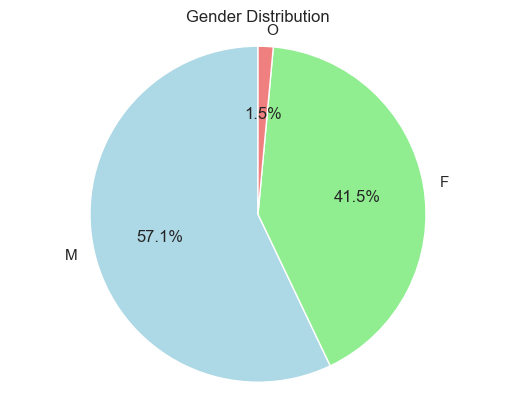

In [33]:
# plot a pie chart for gender

plt.pie(size, labels=size.index, autopct='%1.1f%%', startangle=90, colors=['lightBlue', 'lightGreen', 'lightcoral'])
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()


              age
gender           
F       56.735564
M       51.730580
O       54.120625


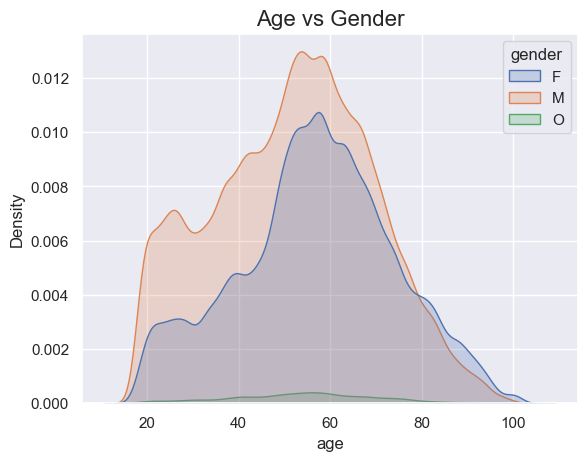

In [34]:
print(dfc_new.groupby('gender').agg({'age': 'mean'}))
sns.kdeplot(data = dfc_new, x = 'age', hue = 'gender', fill = True)
plt.title('Age vs Gender', fontsize = 16)
plt.show()

              income
gender              
F       69546.750250
M       60589.087289
O       62897.758751


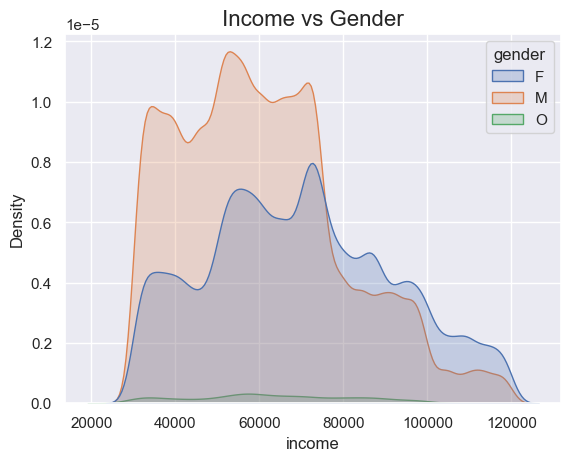

In [35]:
print(dfc_new.groupby('gender').agg({'income': 'mean'}))
sns.kdeplot(data = dfc_new, x = 'income', hue = 'gender', fill = True)
plt.title('Income vs Gender', fontsize = 16)
plt.show()

Splitting the became member too have more features

In [36]:
df_member = dfc_new[['id', 'became_member_on']]

# Add columns `year`, `month`, `day_of_week`
df_member = df_member.assign(year = df_member.became_member_on.dt.year,
                             month = df_member.became_member_on.dt.month,
                             day = df_member.became_member_on.dt.day,
                             month_name = df_member.became_member_on.dt.month_name(),
                             day_of_week = df_member.became_member_on.dt.weekday,
                             day_name = df_member.became_member_on.dt.day_name())
df_member.head(3)

,id,became_member_on,year,month,day,month_name,day_of_week,day_name
0,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,2017,5,9,May,1,Tuesday
1,a03223e636434f42ac4c3df47e8bac43,2017-08-04,2017,8,4,August,4,Friday
2,e2127556f4f64592b11af22de27a7932,2018-04-26,2018,4,26,April,3,Thursday


In [37]:
'''

RESULTS

There are 4 'bogo' offers (i.e. buy one get one), 4 discount offers and 2 informational offers.
Discount offers have the longest duration, followed by bogo offers and Informational offers.
Discount offers have higher difficulty but lower rewards compared with bogo offers.

'''

"\n\nRESULTS\n\nThere are 4 'bogo' offers (i.e. buy one get one), 4 discount offers and 2 informational offers.\nDiscount offers have the longest duration, followed by bogo offers and Informational offers.\nDiscount offers have higher difficulty but lower rewards compared with bogo offers.\n\n"














RESULTS

There are 4 'bogo' offers (i.e. buy one get one), 4 discount offers and 2 informational offers.
Discount offers have the longest duration, followed by bogo offers and Informational offers.
Discount offers have higher difficulty but lower rewards compared with bogo offers.

More plots on offers

- Offer type distribution
- Distribution Channels 
- trend lines between each pairs of offers

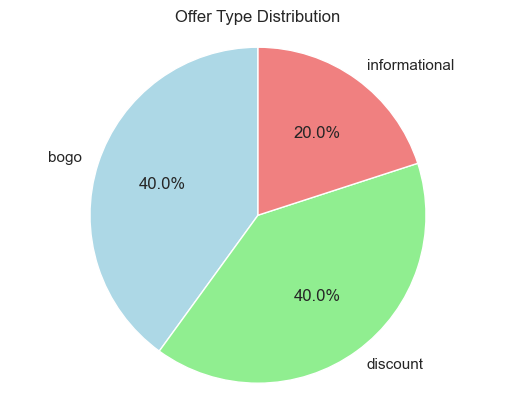

In [38]:
# plot the distribution of offer type
size = offer_df.offer_type.value_counts()
plt.pie(size, labels=size.index, autopct='%1.1f%%', startangle=90, colors=['lightBlue', 'lightGreen', 'lightcoral'])
plt.title('Offer Type Distribution')
plt.axis('equal')
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_155020\4158979799.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = p, x = 'channels', y = 'count', palette = 'viridis')


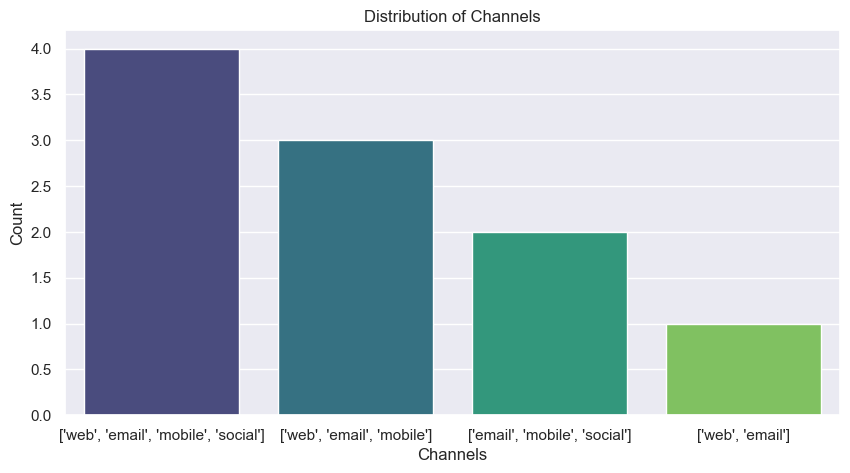

In [39]:
p = offer_df.value_counts('channels')
p = p.reset_index()
p.columns = ['channels', 'count']
p = p.sort_values('count', ascending = False)
p

# plot the distribution of channels
plt.figure(figsize = (10, 5))
sns.barplot(data = p, x = 'channels', y = 'count', palette = 'viridis')
plt.title('Distribution of Channels')
plt.xlabel('Channels')
plt.ylabel('Count')
plt.show()

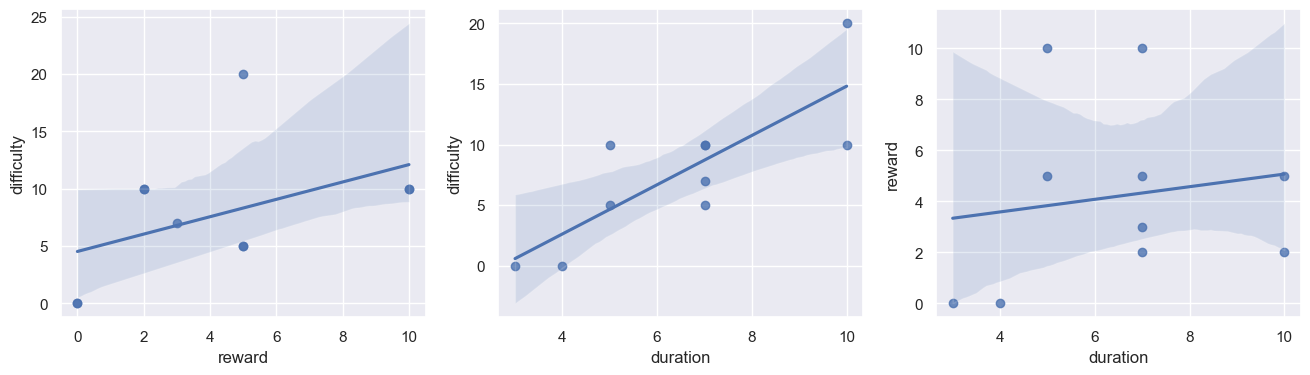

In [40]:
# correlation between reward and difficulty
fig, axs = plt.subplots(1,3, figsize = (16,4))
sns.regplot(data = offer_df, x = 'reward', y = 'difficulty', ax = axs[0])

sns.regplot(data = offer_df,  x  = 'duration', y = 'difficulty', ax = axs[1])

sns.regplot(data = offer_df, x = 'duration', y = 'reward',ax = axs[2])
plt.show()


- reward- duration = less positive relation
- difficulty - duration = highly positive relation
- difficulty - reward = positive relation

In [41]:
dfc_new['event'].value_counts()

event
transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: count, dtype: int64

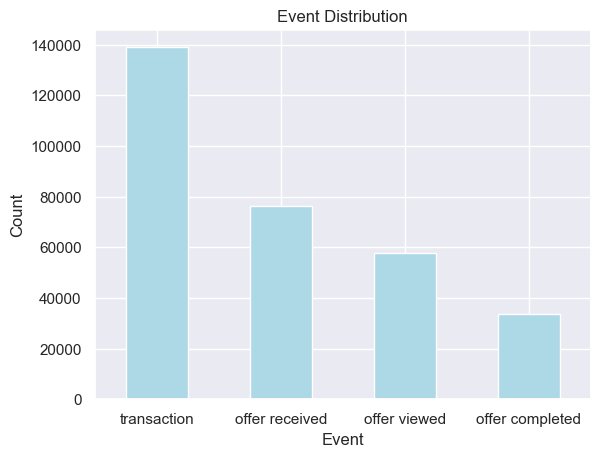

In [42]:
dfc_new['event'].value_counts().plot(kind='bar', color='lightBlue')
plt.title('Event Distribution')
plt.xticks(rotation = None)
plt.xlabel('Event')
plt.ylabel('Count')
plt.show()


In [43]:
profile_transcript_merged

,gender,age,id,became_member_on,income,member_year,event,value,time
0,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,2017,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,NaN,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,2017,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,2018,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,NaN,118,8ec6ce2a7e7949b1bf142def7d0e0586,2017-09-25,NaN,2017,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,NaN,118,68617ca6246f4fbc85e91a2a49552598,2017-10-02,NaN,2017,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...,...,...,...,...,...
306529,M,66,b3a1272bc9904337b331bf348c3e8c17,2018-01-01,47000.0,2018,transaction,{'amount': 1.5899999999999999},714
306530,M,52,68213b08d99a4ae1b0dcb72aebd9aa35,2018-04-08,62000.0,2018,transaction,{'amount': 9.53},714
306531,F,63,a00058cf10334a308c68e7631c529907,2013-09-22,52000.0,2013,transaction,{'amount': 3.61},714
306532,M,57,76ddbd6576844afe811f1a3c0fbb5bec,2016-07-09,40000.0,2016,transaction,{'amount': 3.5300000000000002},714


Results
- Transaction no. is around 4 times that of offer completed, mostly customers are doing transaction without any offer, good comsumer stickliness but FMCG brand so was expected
- very high % of user recieving the offer viewed it, ig due to good design, promotion etc

In [44]:
transcript_df = dfc_new.copy()

In [45]:
transcripts = transcript_df.assign(days_since_start = transcript_df['time']/24)
print('The minimum and the maximum: {} and {}'.format(transcripts['days_since_start'].min(), transcripts['days_since_start'].max()))

The minimum and the maximum: 0.0 and 29.75


Therefore data given for for around 30 days

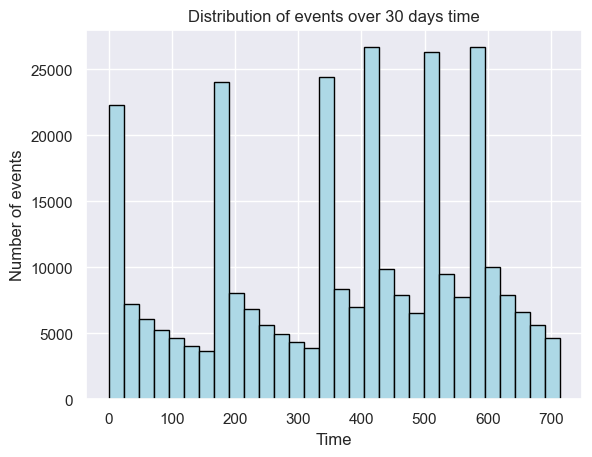

In [46]:
plt.hist(transcripts['time'], bins=30, color='lightBlue', edgecolor='black')
plt.title('Distribution of events over 30 days time')
plt.xlabel('Time')
plt.ylabel('Number of events')
plt.show()


graph seems to have 6 peaks

In [47]:
transcripts[transcripts['event']== 'offer viewed'].groupby('time').count()

,gender,age,id,became_member_on,income,member_year,event,value,values,reward,keys,days_since_start
time,,,,,,,,,,,,
0,1757,2072,2072,2072,1757,2072,2072,2072,2072,2072,2072,2072
6,1232,1433,1433,1433,1232,1433,1433,1433,1433,1433,1433,1433
12,956,1085,1085,1085,956,1085,1085,1085,1085,1085,1085,1085
18,777,884,884,884,777,884,884,884,884,884,884,884
24,627,734,734,734,627,734,734,734,734,734,734,734
...,...,...,...,...,...,...,...,...,...,...,...,...
690,81,87,87,87,81,87,87,87,87,87,87,87
696,69,74,74,74,69,74,74,74,74,74,74,74
702,53,59,59,59,53,59,59,59,59,59,59,59


In [48]:
transcripts[transcripts['event']== 'offer received'].groupby('time').count()

,gender,age,id,became_member_on,income,member_year,event,value,values,reward,keys,days_since_start
time,,,,,,,,,,,,
0,11023,12650,12650,12650,11023,12650,12650,12650,12650,12650,12650,12650
168,11061,12669,12669,12669,11061,12669,12669,12669,12669,12669,12669,12669
336,11080,12711,12711,12711,11080,12711,12711,12711,12711,12711,12711,12711
408,11124,12778,12778,12778,11124,12778,12778,12778,12778,12778,12778,12778
504,11048,12704,12704,12704,11048,12704,12704,12704,12704,12704,12704,12704
576,11165,12765,12765,12765,11165,12765,12765,12765,12765,12765,12765,12765


6 peaks have high event counts which maps with offer received

In [49]:
profile_df = profile.copy()
profile_df.notna().sum()

Unnamed: 0          17000
gender              14825
age                 17000
id                  17000
became_member_on    17000
income              14825
member_year         17000
dtype: int64

In [50]:
profile_df = profile.copy()

In [51]:
profile_df.drop(['Unnamed: 0','became_member_on'], axis = 1, inplace = True)


In [52]:
# remove rows with missing values
profile_df.dropna(inplace = True)

profile

## Reframing dataset for user segmentation model

In [53]:
len(dfc_new['values'].unique())

5113

In [54]:
merged_df = pd.merge(profile_df, dfc_new, left_on='id', right_on='id', how='inner')

# Calculate the transaction frequency for each user
# Assuming 'event' column in dfc_new indicates transactions
transaction_frequency = merged_df[merged_df['event'] == 'transaction'].groupby('id').size()

# Display the transaction frequency for each user
print("transaction frequency length",len(transaction_frequency))

# Calculate the average transaction amount for each user
# Assuming 'values' column in dfc_new indicates transaction amount
average_transaction_amount = merged_df[merged_df['event'] == 'transaction'].groupby('id')['values'].mean()

# Display the average transaction amount for each user
print("avg transaction amt count",len(average_transaction_amount))

# Calculate the total click rate for each user
# Assuming 'event' column in dfc_new indicates clicks
# click rate is the ratio of the number of clicks to the number of offers received
click_rate = merged_df[merged_df['event'] == 'offer viewed'].groupby('id').size() / merged_df[merged_df['event'] == 'offer received'].groupby('id').size()

# Display the total click rate for each user
print("click rate count",len(click_rate))

# calculate completion rate for each user
# completion rate is the ratio of the number of offers completed to the number of offers received
completion_rate = merged_df[merged_df['event'] == 'offer completed'].groupby('id').size() / merged_df[merged_df['event'] == 'offer received'].groupby('id').size()

# Display the completion rate for each user
print("completion rate count",len(completion_rate))



transaction frequency length 14492


avg transaction amt count 14492
click rate count 14820
completion rate count 14820


In [55]:
# Convert Series to DataFrame for easier merging
transaction_frequency_df = transaction_frequency.reset_index(name='transaction_frequency')
average_transaction_amount_df = average_transaction_amount.reset_index(name='average_transaction_amount')
click_rate_df = click_rate.reset_index(name='click_rate')
completion_rate_df = completion_rate.reset_index(name='completion_rate')

# Merge these dataframes into profile_df
profile_df = profile_df.merge(transaction_frequency_df, on='id', how='left')
profile_df = profile_df.merge(average_transaction_amount_df, on='id', how='left')
profile_df = profile_df.merge(click_rate_df, on='id', how='left')
profile_df = profile_df.merge(completion_rate_df, on='id', how='left')

# Fill NA values with 0 or an appropriate value
profile_df['transaction_frequency'].fillna(0, inplace=True)
profile_df['average_transaction_amount'].fillna(0, inplace=True)
profile_df['click_rate'].fillna(0, inplace=True)  # Assuming no clicks means a rate of 0
profile_df['completion_rate'].fillna(0, inplace=True)  # Assuming no completions means a rate of 0


C:\Users\asus\AppData\Local\Temp\ipykernel_155020\4057899879.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  profile_df['transaction_frequency'].fillna(0, inplace=True)
C:\Users\asus\AppData\Local\Temp\ipykernel_155020\4057899879.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [56]:
profile_df.head()

,gender,age,id,income,member_year,transaction_frequency,average_transaction_amount,click_rate,completion_rate
0,F,55,0610b486422d4921ae7d2bf64640c50b,112000.0,2017,3.0,25.670000,0.000000,0.500000
1,F,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017,7.0,22.752857,1.000000,0.750000
2,M,68,e2127556f4f64592b11af22de27a7932,70000.0,2018,3.0,19.243333,0.750000,0.500000
3,M,65,389bc3fa690240e798340f5a15918d5c,53000.0,2018,3.0,12.143333,1.000000,0.833333
4,M,58,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,2017,4.0,3.905000,0.666667,0.333333


In [57]:

# Print the updated profile_df to check the new columns
profile_df['transaction_frequency'].value_counts()

transaction_frequency
5.0     1370
4.0     1331
6.0     1325
7.0     1174
8.0     1135
3.0     1054
10.0     888
9.0      864
11.0     744
2.0      674
12.0     643
13.0     573
14.0     472
15.0     375
16.0     337
0.0      333
1.0      319
17.0     266
18.0     240
19.0     176
20.0     133
21.0     113
22.0      99
23.0      62
25.0      39
24.0      35
26.0      15
27.0      11
28.0       7
29.0       7
30.0       5
32.0       2
36.0       2
35.0       1
31.0       1
Name: count, dtype: int64

In [58]:
profile_df

,gender,age,id,income,member_year,transaction_frequency,average_transaction_amount,click_rate,completion_rate
0,F,55,0610b486422d4921ae7d2bf64640c50b,112000.0,2017,3.0,25.670000,0.000000,0.500000
1,F,75,78afa995795e4d85b5d9ceeca43f5fef,100000.0,2017,7.0,22.752857,1.000000,0.750000
2,M,68,e2127556f4f64592b11af22de27a7932,70000.0,2018,3.0,19.243333,0.750000,0.500000
3,M,65,389bc3fa690240e798340f5a15918d5c,53000.0,2018,3.0,12.143333,1.000000,0.833333
4,M,58,2eeac8d8feae4a8cad5a6af0499a211d,51000.0,2017,4.0,3.905000,0.666667,0.333333
...,...,...,...,...,...,...,...,...,...
14820,F,45,6d5f3a774f3d4714ab0c092238f3a1d7,54000.0,2018,7.0,2.861429,1.000000,0.000000
14821,M,61,2cb4f97358b841b9a9773a7aa05a9d77,72000.0,2018,7.0,3.710000,0.333333,0.333333
14822,M,49,01d26f638c274aa0b965d24cefe3183f,73000.0,2017,8.0,4.967500,0.333333,0.000000
14823,F,83,9dc1421481194dcd9400aec7c9ae6366,50000.0,2016,14.0,13.547857,1.000000,1.000000


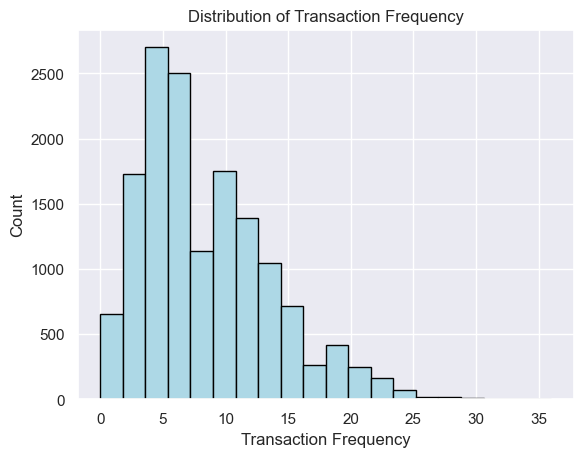

In [59]:
# plot the distribution of transaction frequency

plt.hist(profile_df['transaction_frequency'], bins=20, color='lightBlue', edgecolor='black')
plt.title('Distribution of Transaction Frequency')
plt.xlabel('Transaction Frequency')
plt.ylabel('Count')
plt.show()


In [60]:
merged_df['keys'].unique()

array(['amount', 'offer_id'], dtype=object)

In [61]:

# check how many unique values are present where keys is offer_id
len(merged_df[merged_df["keys"] == 'offer_id']['values'].unique())

10

In [62]:
# add alias to each offer in portfolio

portfolio['offer_alias'] = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']


In [63]:
# Assuming 'offer_id' is the common identifier in both 'merged_df' and 'portfolio'
# First, merge the portfolio details into merged_df

merged_df.drop(['reward'], axis = 1, inplace = True)


In [64]:
# map gender M to 0 and female to 1

profile_df['gender'] = profile_df['gender'].map({'M': 0, 'F': 1})

In [65]:
profile_df.set_index('id', inplace = True)

In [66]:
profile_df.drop(['member_year'],axis = 1, inplace = True)


In [67]:
profile_df.head()

,gender,age,income,transaction_frequency,average_transaction_amount,click_rate,completion_rate
id,,,,,,,
0610b486422d4921ae7d2bf64640c50b,1.0,55,112000.0,3.0,25.670000,0.000000,0.500000
78afa995795e4d85b5d9ceeca43f5fef,1.0,75,100000.0,7.0,22.752857,1.000000,0.750000
e2127556f4f64592b11af22de27a7932,0.0,68,70000.0,3.0,19.243333,0.750000,0.500000
389bc3fa690240e798340f5a15918d5c,0.0,65,53000.0,3.0,12.143333,1.000000,0.833333
2eeac8d8feae4a8cad5a6af0499a211d,0.0,58,51000.0,4.0,3.905000,0.666667,0.333333


## Analysis

In [68]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans



In [69]:

# drop nan values 
profile_df.dropna(inplace = True)

profile_df.isna().sum()



gender                        0
age                           0
income                        0
transaction_frequency         0
average_transaction_amount    0
click_rate                    0
completion_rate               0
dtype: int64

In [70]:
# profile_df = profile_df.drop(['cluster'],axis = 1)

In [71]:
profile_df

,gender,age,income,transaction_frequency,average_transaction_amount,click_rate,completion_rate
id,,,,,,,
0610b486422d4921ae7d2bf64640c50b,1.0,55,112000.0,3.0,25.670000,0.000000,0.500000
78afa995795e4d85b5d9ceeca43f5fef,1.0,75,100000.0,7.0,22.752857,1.000000,0.750000
e2127556f4f64592b11af22de27a7932,0.0,68,70000.0,3.0,19.243333,0.750000,0.500000
389bc3fa690240e798340f5a15918d5c,0.0,65,53000.0,3.0,12.143333,1.000000,0.833333
2eeac8d8feae4a8cad5a6af0499a211d,0.0,58,51000.0,4.0,3.905000,0.666667,0.333333
...,...,...,...,...,...,...,...
6d5f3a774f3d4714ab0c092238f3a1d7,1.0,45,54000.0,7.0,2.861429,1.000000,0.000000
2cb4f97358b841b9a9773a7aa05a9d77,0.0,61,72000.0,7.0,3.710000,0.333333,0.333333
01d26f638c274aa0b965d24cefe3183f,0.0,49,73000.0,8.0,4.967500,0.333333,0.000000


In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
profile_df_scaled = scaler.fit_transform(profile_df)

# Convert the scaled data into a DataFrame
profile_df_scaled = pd.DataFrame(profile_df_scaled, columns = profile_df.columns)


In [73]:
profile_df_scaled

,gender,age,income,transaction_frequency,average_transaction_amount,click_rate,completion_rate
0,1.0,0.445783,0.911111,0.083333,0.056859,0.000000,0.500000
1,1.0,0.686747,0.777778,0.194444,0.050397,1.000000,0.750000
2,0.0,0.602410,0.444444,0.083333,0.042624,0.750000,0.500000
3,0.0,0.566265,0.255556,0.083333,0.026897,1.000000,0.833333
4,0.0,0.481928,0.233333,0.111111,0.008650,0.666667,0.333333
...,...,...,...,...,...,...,...
14608,1.0,0.325301,0.266667,0.194444,0.006338,1.000000,0.000000
14609,0.0,0.518072,0.466667,0.194444,0.008218,0.333333,0.333333
14610,0.0,0.373494,0.477778,0.222222,0.011003,0.333333,0.000000
14611,1.0,0.783133,0.222222,0.388889,0.030008,1.000000,1.000000


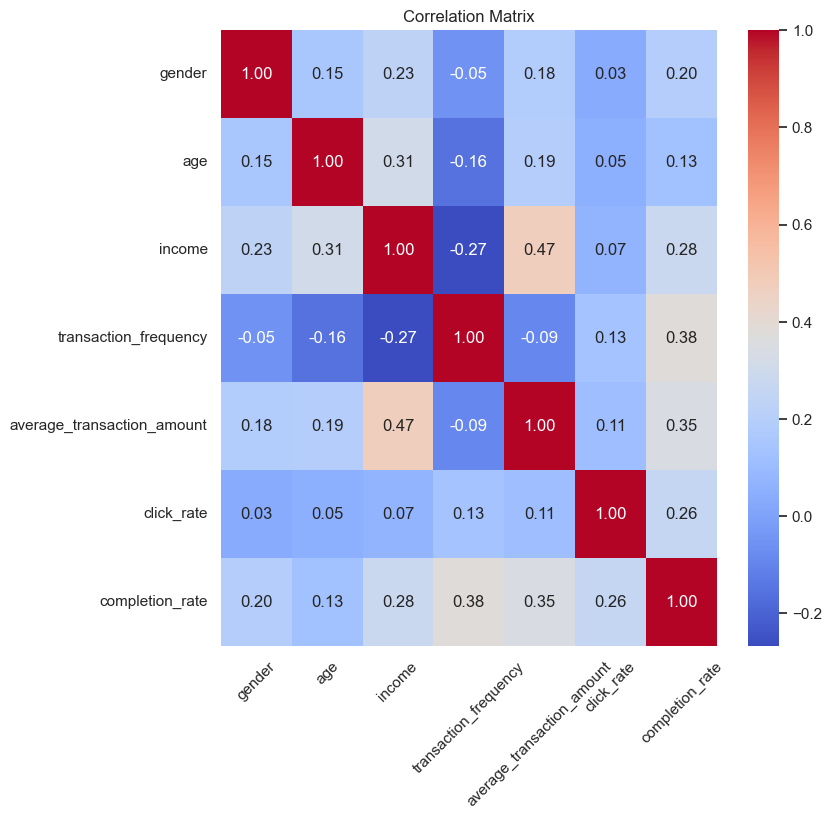

In [74]:
# correlation analysis
correlation_matrix = np.corrcoef(profile_df_scaled.T)
sns.set(font_scale=1.0)
plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=profile_df.columns, yticklabels=profile_df.columns)
plt.xticks(rotation=45)
plt.title('Correlation Matrix')
plt.show()

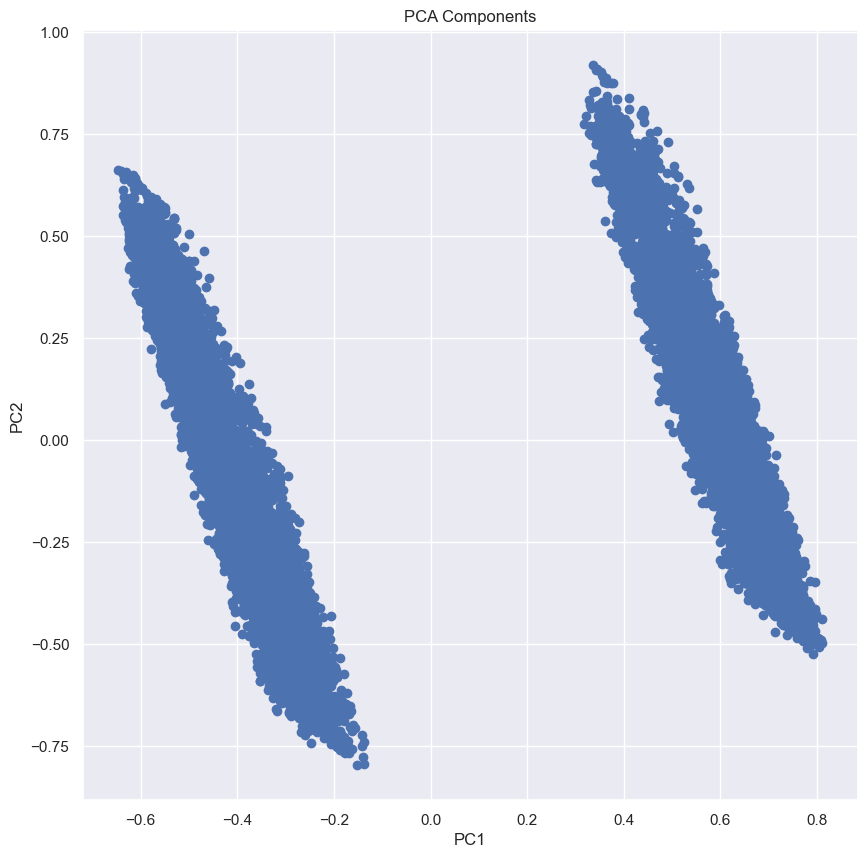

In [75]:
# apply PCA to reduce the dimensionality of the data

pca = PCA(n_components=2)
profile_df_pca = pca.fit_transform(profile_df_scaled)
profile_df_pca = pd.DataFrame(data = profile_df_pca, columns = ['PC1', 'PC2'])


# plot the PCA components
plt.figure(figsize=(10, 10))
plt.scatter(profile_df_pca['PC1'], profile_df_pca['PC2'])
plt.title('PCA Components')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [76]:
print(pca.explained_variance_ratio_)

[0.48464913 0.21809813]


### 2D visualization

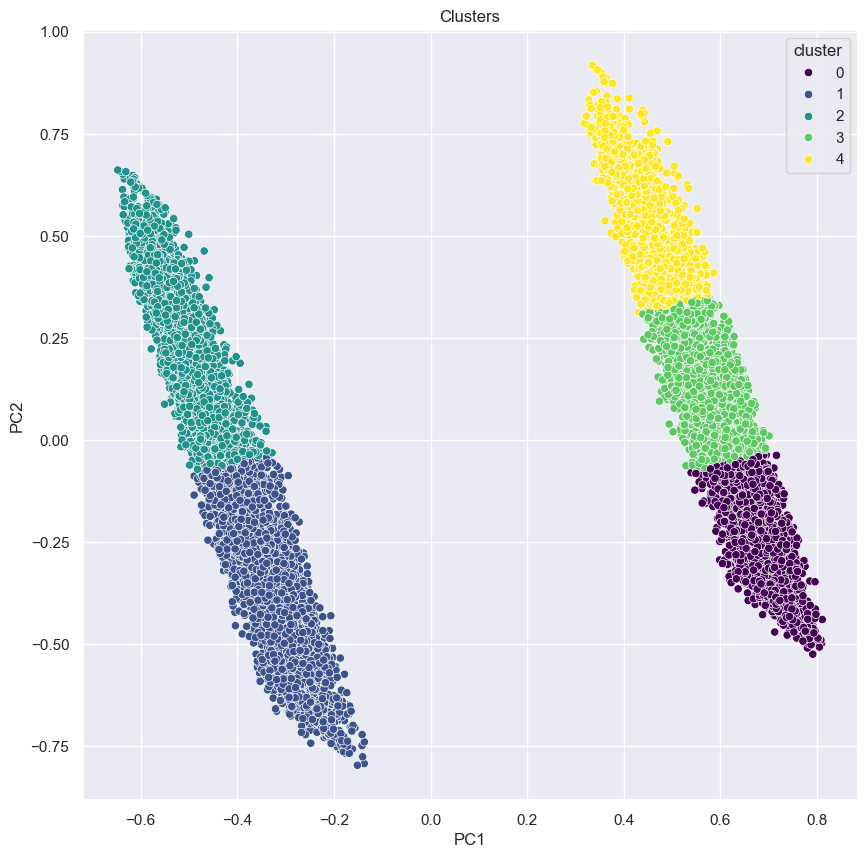

In [77]:
# using KMeans to get 5 clusters and plot them
kmeans = KMeans(n_clusters=5, random_state=0).fit(profile_df_pca)
profile_df_pca['cluster'] = kmeans.labels_

plt.figure(figsize=(10, 10))
sns.scatterplot(x='PC1', y='PC2', data=profile_df_pca, hue='cluster', palette='viridis')
plt.title('Clusters')
plt.show()


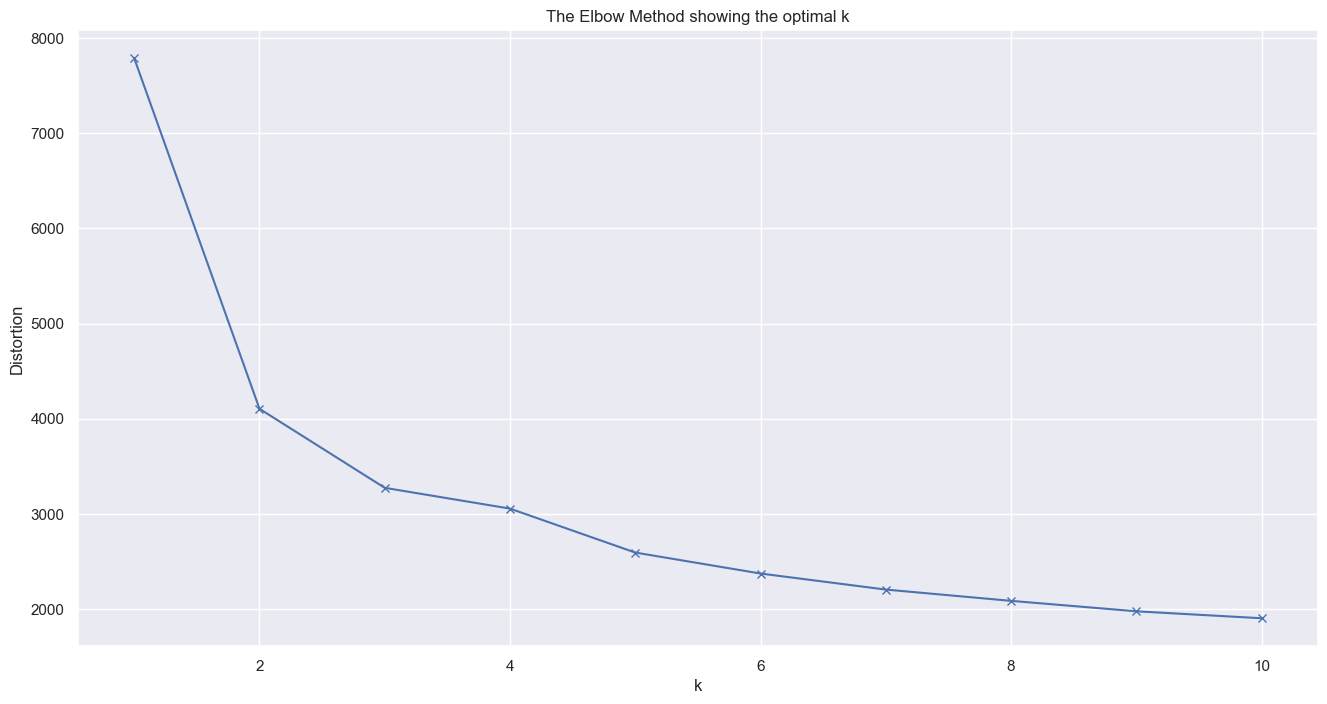

In [78]:
# Assuming `profile_df_scaled` is your scaled data
# Calculate distortions for a range of number of cluster
distortions = []
K = range(1, 11)  # Adjust the range of k as necessary
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(profile_df_scaled)
    distortions.append(kmeanModel.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(16, 8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [79]:
# tsne 2d 
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
profile_df_tsne = tsne.fit_transform(profile_df_scaled)
profile_df_tsne = pd.DataFrame(data = profile_df_tsne, columns = ['t-SNE1', 't-SNE2'])


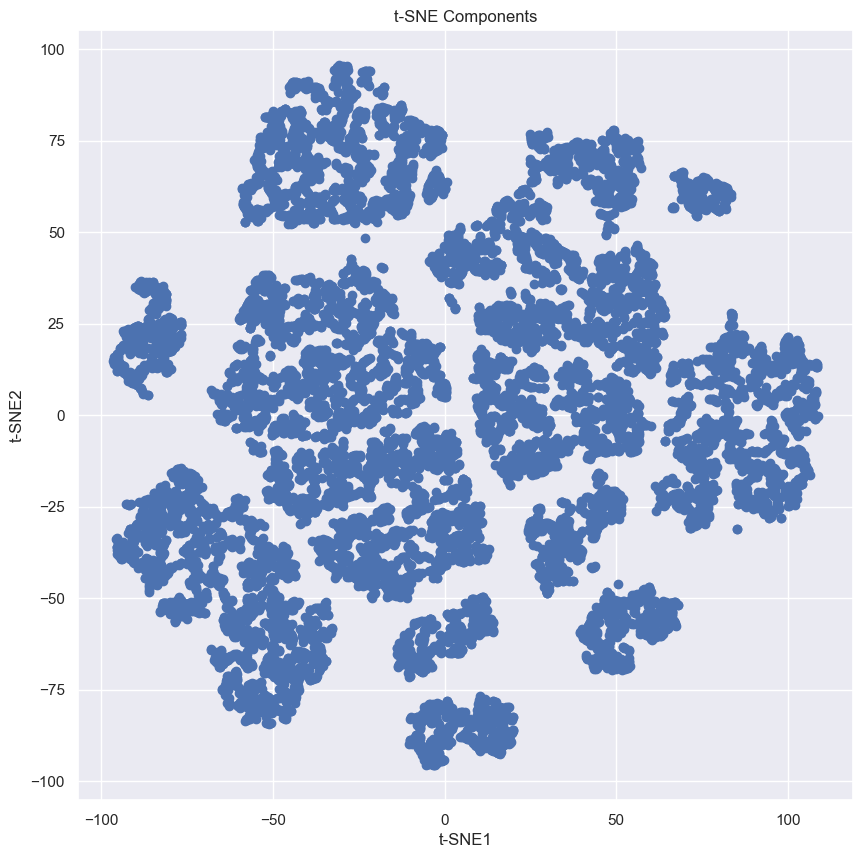

In [80]:
# plot the t-SNE components
plt.figure(figsize=(10, 10))
plt.scatter(profile_df_tsne['t-SNE1'], profile_df_tsne['t-SNE2'])
plt.title('t-SNE Components')
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')
plt.show()

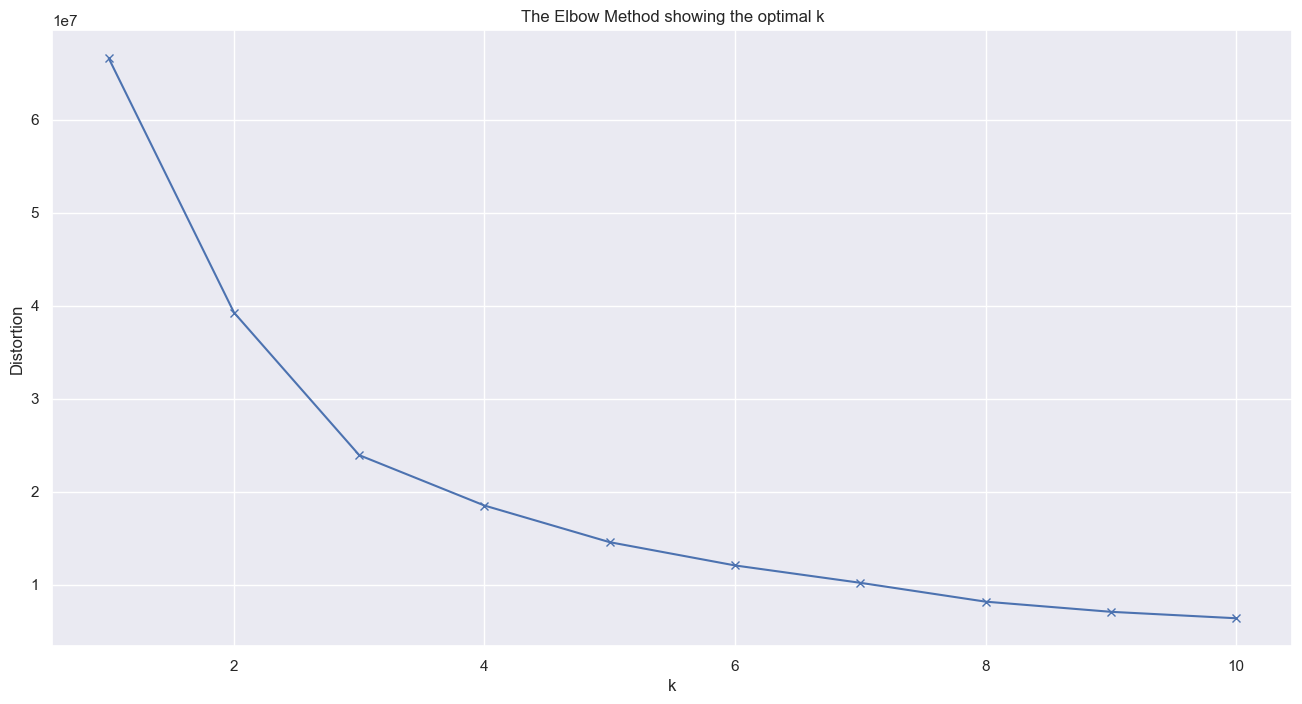

In [81]:
# elbow method and get clusters KMeans
distortions = []

K = range(1, 11)  # Adjust the range of k as necessary
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42)
    kmeanModel.fit(profile_df_tsne)
    distortions.append(kmeanModel.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(16, 8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()



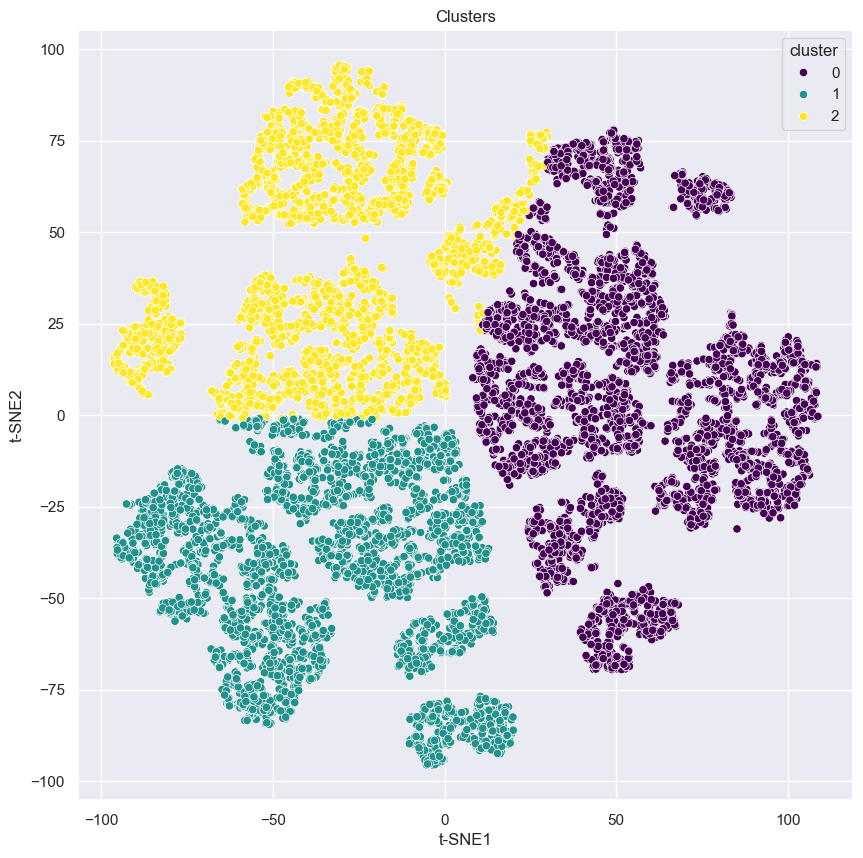

In [82]:
# using KMeans to get 5 clusters and plot them
kmeans = KMeans(n_clusters=3, random_state=0).fit(profile_df_tsne)
profile_df_tsne['cluster'] = kmeans.labels_

plt.figure(figsize=(10, 10))
sns.scatterplot(x='t-SNE1', y='t-SNE2', data=profile_df_tsne, hue='cluster', palette='viridis')
plt.title('Clusters')
plt.show()

### 3D visualization

In [83]:
# # PCA in 3d

# pca = PCA(n_components=3)
# profile_df_pca = pca.fit_transform(profile_df_scaled)
# profile_df_pca = pd.DataFrame(data = profile_df_pca, columns = ['PC1', 'PC2', 'PC3'])

# # plot the PCA components
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(profile_df_pca['PC1'], profile_df_pca['PC2'], profile_df_pca['PC3'])
# plt.title('PCA Components')
# ax.set_xlabel('PC1')
# ax.set_ylabel('PC2')
# ax.set_zlabel('PC3')
# plt.show()


In [84]:

# # using KMeans to get 5 clusters and plot them
# kmeans = KMeans(n_clusters=5, random_state=0).fit(profile_df_pca)
# profile_df_pca['cluster'] = kmeans.labels_

# fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(profile_df_pca['PC1'], profile_df_pca['PC2'], profile_df_pca['PC3'], c=profile_df_pca['cluster'], cmap='viridis')
# plt.title('Clusters')
# ax.set_xlabel('PC1')
# ax.set_ylabel('PC2')
# ax.set_zlabel('PC3')
# plt.show()

# # plot the distribution of clusters
# plt.figure(figsize=(10, 10))
# sns.countplot(x='cluster', data=profile_df_pca, palette='viridis')
# plt.title('Cluster Distribution')
# plt.show()



In [85]:
# import plotly.express as px

# fig = px.scatter_3d(profile_df_pca, x='PC1', y='PC2', z='PC3', color='cluster')
# fig.show()

In [86]:
# print(pca.explained_variance_ratio_)

In [87]:
# from sklearn.manifold import TSNE

# # Apply t-SNE to the scaled data
# tsne = TSNE(n_components=3, perplexity=30, n_iter=300)
# profile_df_tsne = tsne.fit_transform(profile_df_scaled)

# # Create a DataFrame for the t-SNE data
# profile_df_tsne = pd.DataFrame(data = profile_df_tsne, columns = ['t-SNE1', 't-SNE2', 't-SNE3'])


In [88]:
# # 3d plot of t-SNE components using plotly

# fig = px.scatter_3d(profile_df_tsne, x='t-SNE1', y='t-SNE2', z='t-SNE3')
# fig.show()

In [89]:
# kmeans = KMeans(n_clusters=5, random_state=0).fit(profile_df_tsne)
# profile_df_tsne['cluster'] = kmeans.labels_

# fig = px.scatter_3d(profile_df_tsne, x='t-SNE1', y='t-SNE2', z='t-SNE3', color='cluster')
# fig.show()

In [90]:
# # use tsne columns to do the Kmeans
# kmeans = KMeans(n_clusters = 5)
# kmeans.fit(profile_df_tsne[['t-SNE1','t-SNE2','t-SNE2']])
# profile_df_tsne['cluster'] = kmeans.labels_


# fig = px.scatter_3d(profile_df_tsne, x='t-SNE1', y='t-SNE2', z='t-SNE3', color='cluster')
# fig.show()

In [91]:
profile_df_tsne['cluster'].value_counts()

cluster
0    5631
1    4734
2    4248
Name: count, dtype: int64

In [92]:
profile_df_tsne.head()

,t-SNE1,t-SNE2,cluster
0,1.212404,48.747219,2
1,101.656219,-18.802328,0
2,-12.413735,-12.593219,1
3,-41.733482,-64.689369,1
4,-43.188278,10.770694,2


In [93]:
profile_df

,gender,age,income,transaction_frequency,average_transaction_amount,click_rate,completion_rate
id,,,,,,,
0610b486422d4921ae7d2bf64640c50b,1.0,55,112000.0,3.0,25.670000,0.000000,0.500000
78afa995795e4d85b5d9ceeca43f5fef,1.0,75,100000.0,7.0,22.752857,1.000000,0.750000
e2127556f4f64592b11af22de27a7932,0.0,68,70000.0,3.0,19.243333,0.750000,0.500000
389bc3fa690240e798340f5a15918d5c,0.0,65,53000.0,3.0,12.143333,1.000000,0.833333
2eeac8d8feae4a8cad5a6af0499a211d,0.0,58,51000.0,4.0,3.905000,0.666667,0.333333
...,...,...,...,...,...,...,...
6d5f3a774f3d4714ab0c092238f3a1d7,1.0,45,54000.0,7.0,2.861429,1.000000,0.000000
2cb4f97358b841b9a9773a7aa05a9d77,0.0,61,72000.0,7.0,3.710000,0.333333,0.333333
01d26f638c274aa0b965d24cefe3183f,0.0,49,73000.0,8.0,4.967500,0.333333,0.000000


In [94]:
profile_df = profile_df.reset_index()
profile_df['cluster'] = profile_df_tsne['cluster']

In [95]:
profile_df

,id,gender,age,income,transaction_frequency,average_transaction_amount,click_rate,completion_rate,cluster
0,0610b486422d4921ae7d2bf64640c50b,1.0,55,112000.0,3.0,25.670000,0.000000,0.500000,2
1,78afa995795e4d85b5d9ceeca43f5fef,1.0,75,100000.0,7.0,22.752857,1.000000,0.750000,0
2,e2127556f4f64592b11af22de27a7932,0.0,68,70000.0,3.0,19.243333,0.750000,0.500000,1
3,389bc3fa690240e798340f5a15918d5c,0.0,65,53000.0,3.0,12.143333,1.000000,0.833333,1
4,2eeac8d8feae4a8cad5a6af0499a211d,0.0,58,51000.0,4.0,3.905000,0.666667,0.333333,2
...,...,...,...,...,...,...,...,...,...
14608,6d5f3a774f3d4714ab0c092238f3a1d7,1.0,45,54000.0,7.0,2.861429,1.000000,0.000000,0
14609,2cb4f97358b841b9a9773a7aa05a9d77,0.0,61,72000.0,7.0,3.710000,0.333333,0.333333,2
14610,01d26f638c274aa0b965d24cefe3183f,0.0,49,73000.0,8.0,4.967500,0.333333,0.000000,2
14611,9dc1421481194dcd9400aec7c9ae6366,1.0,83,50000.0,14.0,13.547857,1.000000,1.000000,0


In [96]:
merged_df_copy = merged_df.copy()

In [97]:
aliases = {offer_id: chr(i + 65) for i, offer_id in enumerate(portfolio['id'].unique())}
portfolio['alias'] = portfolio['id'].map(aliases)

# Display this mapping
print(portfolio[['id', 'alias']])

                                 id alias
0  ae264e3637204a6fb9bb56bc8210ddfd     A
1  4d5c57ea9a6940dd891ad53e9dbe8da0     B
2  3f207df678b143eea3cee63160fa8bed     C
3  9b98b8c7a33c4b65b9aebfe6a799e6d9     D
4  0b1e1539f2cc45b7b9fa7c272da2e1d7     E
5  2298d6c36e964ae4a3e7e9706d1fb8c2     F
6  fafdcd668e3743c1bb461111dcafc2a4     G
7  5a8bc65990b245e5a138643cd4eb9837     H
8  f19421c1d4aa40978ebb69ca19b0e20d     I
9  2906b810c7d4411798c6938adc9daaa5     J


In [98]:
# Assuming merged_df_copy and portfolio are already loaded

# Extract offer_id from the 'value' column where needed
merged_df_copy['offer_id'] = merged_df_copy.apply(lambda row: row['values'] if row['keys'] == 'offer_id' else None, axis=1)

# Updated processing function to use aliases
def process_group(group):
    # Initialize a dictionary to hold the count for each state and offer, using aliases
    offer_counts = {f'offer_{state}_{aliases[offer_id]}': 0 for state in ['received', 'viewed', 'completed'] for offer_id in portfolio['id'].unique()}

    # Extract offer_id and update it to alias in the dataframe
    group['offer_alias'] = group['offer_id'].map(aliases)

    # Loop through each row in the group
    for index, row in group.iterrows():
        if row['event'] in ['offer received', 'offer viewed', 'offer completed']:
            # Get the alias for the offer_id
            offer_alias = row['offer_alias']
            # Standardize the event name to match our keys in the dictionary
            event_type = row['event'].replace(' ', '_')  # e.g., 'offer_received'
            # Increment the corresponding count using the alias
            offer_counts[f'{event_type}_{offer_alias}'] += 1

    return pd.Series(offer_counts)

# Apply the function to each group
offer_data = merged_df_copy.groupby('id').apply(process_group)

# Join this data back with the profile_df if needed
profile_df_copy = profile_df.join(offer_data, on='id')


C:\Users\asus\AppData\Local\Temp\ipykernel_155020\3944647128.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  offer_data = merged_df_copy.groupby('id').apply(process_group)


In [99]:
portfolio.head()

,Unnamed: 0,reward,channels,difficulty,duration,offer_type,id,offer_alias,alias
0,0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd,A,A
1,1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0,B,B
2,2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed,C,C
3,3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9,D,D
4,4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7,E,E


In [100]:
profile_df_copy.head()

,id,gender,age,income,transaction_frequency,average_transaction_amount,click_rate,completion_rate,cluster,offer_received_A,...,offer_completed_A,offer_completed_B,offer_completed_C,offer_completed_D,offer_completed_E,offer_completed_F,offer_completed_G,offer_completed_H,offer_completed_I,offer_completed_J
0,0610b486422d4921ae7d2bf64640c50b,1.0,55,112000.0,3.0,25.670000,0.000000,0.500000,2,0,...,0,0,0,1,0,0,0,0,0,0
1,78afa995795e4d85b5d9ceeca43f5fef,1.0,75,100000.0,7.0,22.752857,1.000000,0.750000,0,1,...,1,0,0,1,0,0,0,0,1,0
2,e2127556f4f64592b11af22de27a7932,0.0,68,70000.0,3.0,19.243333,0.750000,0.500000,1,0,...,0,0,0,1,0,0,1,0,0,0
3,389bc3fa690240e798340f5a15918d5c,0.0,65,53000.0,3.0,12.143333,1.000000,0.833333,1,0,...,0,0,0,1,0,0,1,0,2,1
4,2eeac8d8feae4a8cad5a6af0499a211d,0.0,58,51000.0,4.0,3.905000,0.666667,0.333333,2,0,...,0,0,0,0,0,0,1,0,0,0


In [101]:
# profile_df_copy.drop(["index"],axis =1).head()

In [102]:
profile_df_copy.set_index('id', inplace = True)

In [103]:
# For all entried with cluter id =0, sum the offer_recieved columns
cluster_df = profile_df_copy.reset_index().drop(['id'],axis=1).groupby('cluster').mean()


In [104]:
cluster_df

,gender,age,income,transaction_frequency,average_transaction_amount,click_rate,completion_rate,offer_received_A,offer_received_B,offer_received_C,...,offer_completed_A,offer_completed_B,offer_completed_C,offer_completed_D,offer_completed_E,offer_completed_F,offer_completed_G,offer_completed_H,offer_completed_I,offer_completed_J
cluster,,,,,,,,,,,,,,,,,,,,,
0,1.000000,56.892026,69317.350382,8.394779,17.724532,0.792482,0.576789,0.454626,0.462085,0.431007,...,0.310602,0.297460,0.0,0.328183,0.274907,0.375955,0.374711,0.0,0.322145,0.305097
1,0.000000,53.543726,65659.907055,10.266582,17.038879,0.855411,0.664090,0.476341,0.460076,0.363329,...,0.335234,0.294888,0.0,0.361005,0.304394,0.463033,0.490494,0.0,0.386565,0.356147
2,0.117232,52.028249,60040.489642,6.191855,8.823556,0.582870,0.168848,0.417844,0.409840,0.568267,...,0.061676,0.045669,0.0,0.131121,0.078625,0.120056,0.118879,0.0,0.092279,0.105226


C:\Users\asus\AppData\Local\Temp\ipykernel_155020\1925818820.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cluster', data=profile_df_copy, palette='viridis')


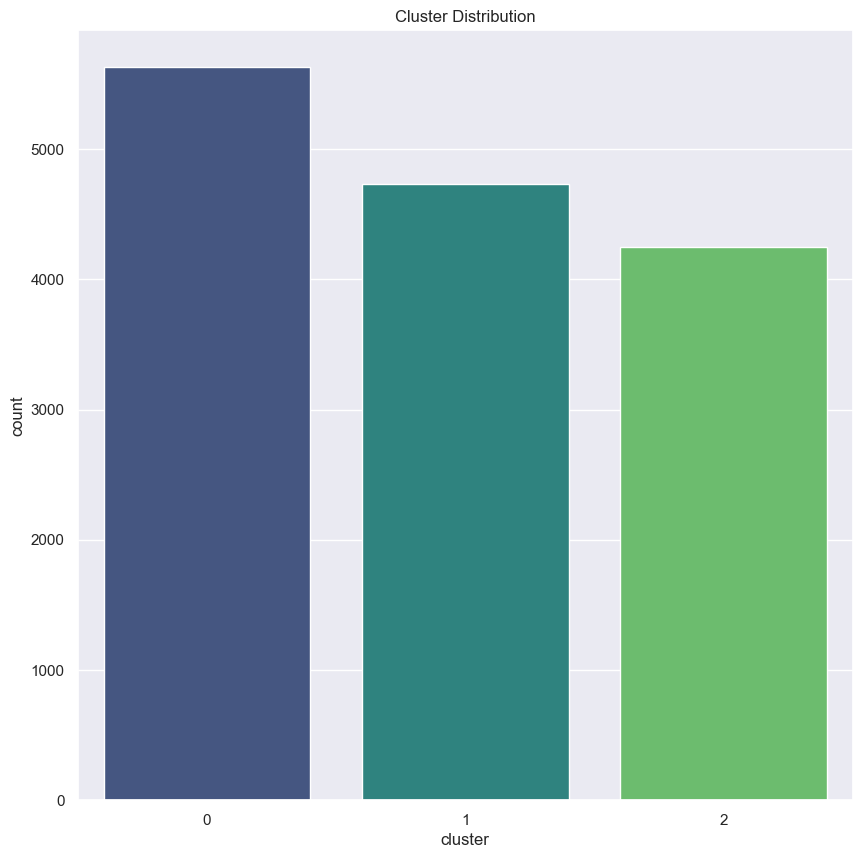

In [105]:
# plot the distribution of clusters

plt.figure(figsize=(10, 10))
sns.countplot(x='cluster', data=profile_df_copy, palette='viridis')
plt.title('Cluster Distribution')
plt.show()

In [106]:
# create a bar chart that shows the total engagement (received, viewed, and completed) for each offer by cluster

viewed_columns = [col for col in profile_df_copy.columns if 'offer_viewed_'  in col]
cluster_viewed = profile_df_copy[viewed_columns + ['cluster']]

cluster_viewed = cluster_viewed.groupby('cluster').sum()

cluster_viewed

,offer_viewed_A,offer_viewed_B,offer_viewed_C,offer_viewed_D,offer_viewed_E,offer_viewed_F,offer_viewed_G,offer_viewed_H,offer_viewed_I,offer_viewed_J
cluster,,,,,,,,,,
0,2273,2511,1443,1501,957,2498,2484,2258,2484,1477
1,2052,2131,1263,1451,961,2400,2487,1779,2289,1436
2,1493,1616,711,471,243,1391,1348,1745,1452,482


In [107]:
# plot a pie chart showing top 3 viewed offer for each cluster

# Function to get top 3 offers
def get_top_3_offers(row):
    return row.nlargest(3).index.tolist()

In [108]:

# Apply function to each row (each cluster's data)
top_3_offers = cluster_viewed.apply(get_top_3_offers, axis=1)

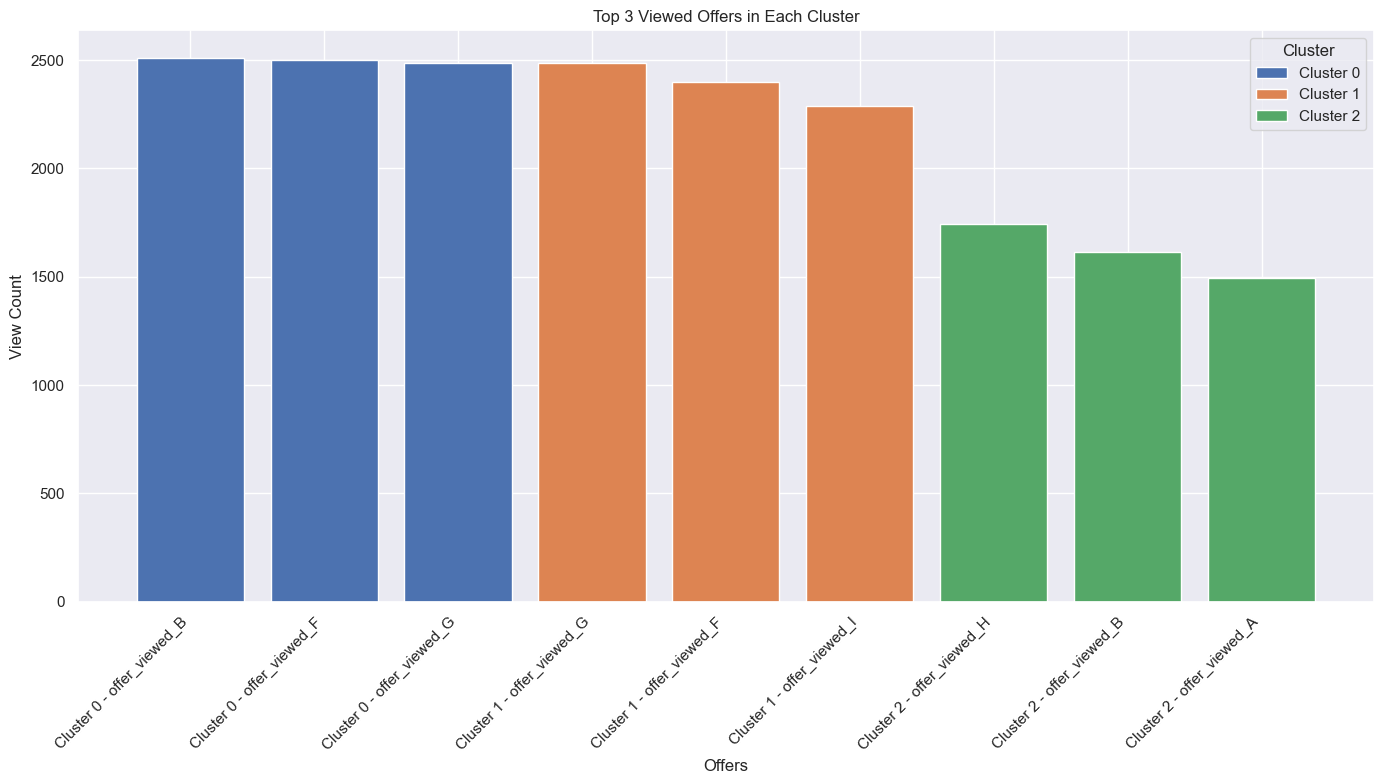

In [109]:
# Plotting setup
fig, ax = plt.subplots(figsize=(14, 8))

# Iterate over each cluster and plot the top 3 offers
for i, (cluster, offers) in enumerate(top_3_offers.items()):
    offer_counts = cluster_viewed.loc[cluster, offers]
    ax.bar(x=[f'Cluster {cluster} - {offer}' for offer in offers], height=offer_counts, label=f'Cluster {cluster}')

ax.set_title('Top 3 Viewed Offers in Each Cluster')
ax.set_xlabel('Offers')
ax.set_ylabel('View Count')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [110]:
completed_columns = [col for col in profile_df_copy.columns if 'offer_completed_' in col]
clusters_completed = profile_df_copy[completed_columns + ['cluster']]

cluster_completed = clusters_completed.groupby('cluster').sum()

cluster_completed

,offer_completed_A,offer_completed_B,offer_completed_C,offer_completed_D,offer_completed_E,offer_completed_F,offer_completed_G,offer_completed_H,offer_completed_I,offer_completed_J
cluster,,,,,,,,,,
0,1749,1675,0,1848,1548,2117,2110,0,1814,1718
1,1587,1396,0,1709,1441,2192,2322,0,1830,1686
2,262,194,0,557,334,510,505,0,392,447


In [111]:
# Apply function to each row (each cluster's data)
top_3_offers = cluster_completed.apply(get_top_3_offers, axis=1)

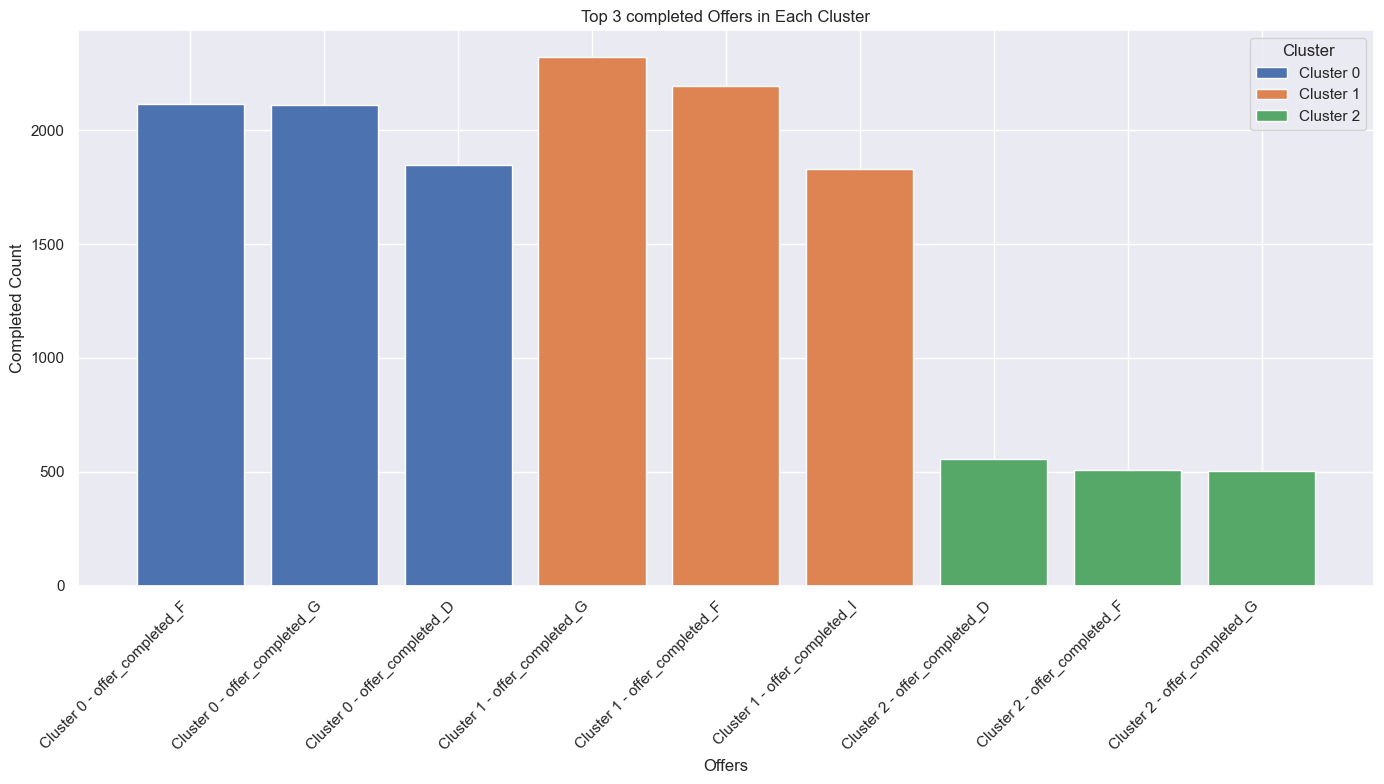

In [112]:
# Plotting setup
fig, ax = plt.subplots(figsize=(14, 8))

# Iterate over each cluster and plot the top 3 offers
for i, (cluster, offers) in enumerate(top_3_offers.items()):
    offer_counts = cluster_completed.loc[cluster, offers]
    ax.bar(x=[f'Cluster {cluster} - {offer}' for offer in offers], height=offer_counts, label=f'Cluster {cluster}')

ax.set_title('Top 3 completed Offers in Each Cluster')
ax.set_xlabel('Offers')
ax.set_ylabel('Completed Count')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [113]:
profile_df_copy

,gender,age,income,transaction_frequency,average_transaction_amount,click_rate,completion_rate,cluster,offer_received_A,offer_received_B,...,offer_completed_A,offer_completed_B,offer_completed_C,offer_completed_D,offer_completed_E,offer_completed_F,offer_completed_G,offer_completed_H,offer_completed_I,offer_completed_J
id,,,,,,,,,,,,,,,,,,,,,
0610b486422d4921ae7d2bf64640c50b,1.0,55,112000.0,3.0,25.670000,0.000000,0.500000,2,0,0,...,0,0,0,1,0,0,0,0,0,0
78afa995795e4d85b5d9ceeca43f5fef,1.0,75,100000.0,7.0,22.752857,1.000000,0.750000,0,1,0,...,1,0,0,1,0,0,0,0,1,0
e2127556f4f64592b11af22de27a7932,0.0,68,70000.0,3.0,19.243333,0.750000,0.500000,1,0,0,...,0,0,0,1,0,0,1,0,0,0
389bc3fa690240e798340f5a15918d5c,0.0,65,53000.0,3.0,12.143333,1.000000,0.833333,1,0,0,...,0,0,0,1,0,0,1,0,2,1
2eeac8d8feae4a8cad5a6af0499a211d,0.0,58,51000.0,4.0,3.905000,0.666667,0.333333,2,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6d5f3a774f3d4714ab0c092238f3a1d7,1.0,45,54000.0,7.0,2.861429,1.000000,0.000000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2cb4f97358b841b9a9773a7aa05a9d77,0.0,61,72000.0,7.0,3.710000,0.333333,0.333333,2,0,0,...,0,0,0,1,0,0,0,0,0,0
01d26f638c274aa0b965d24cefe3183f,0.0,49,73000.0,8.0,4.967500,0.333333,0.000000,2,0,0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
profile_df_copy = profile_df_copy.reset_index().drop(['id'],axis = 1)

In [115]:
profile_df_copy

,gender,age,income,transaction_frequency,average_transaction_amount,click_rate,completion_rate,cluster,offer_received_A,offer_received_B,...,offer_completed_A,offer_completed_B,offer_completed_C,offer_completed_D,offer_completed_E,offer_completed_F,offer_completed_G,offer_completed_H,offer_completed_I,offer_completed_J
0,1.0,55,112000.0,3.0,25.670000,0.000000,0.500000,2,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1.0,75,100000.0,7.0,22.752857,1.000000,0.750000,0,1,0,...,1,0,0,1,0,0,0,0,1,0
2,0.0,68,70000.0,3.0,19.243333,0.750000,0.500000,1,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.0,65,53000.0,3.0,12.143333,1.000000,0.833333,1,0,0,...,0,0,0,1,0,0,1,0,2,1
4,0.0,58,51000.0,4.0,3.905000,0.666667,0.333333,2,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14608,1.0,45,54000.0,7.0,2.861429,1.000000,0.000000,0,0,1,...,0,0,0,0,0,0,0,0,0,0
14609,0.0,61,72000.0,7.0,3.710000,0.333333,0.333333,2,0,0,...,0,0,0,1,0,0,0,0,0,0
14610,0.0,49,73000.0,8.0,4.967500,0.333333,0.000000,2,0,0,...,0,0,0,0,0,0,0,0,0,0
14611,1.0,83,50000.0,14.0,13.547857,1.000000,1.000000,0,1,1,...,1,1,0,1,0,0,0,0,0,0


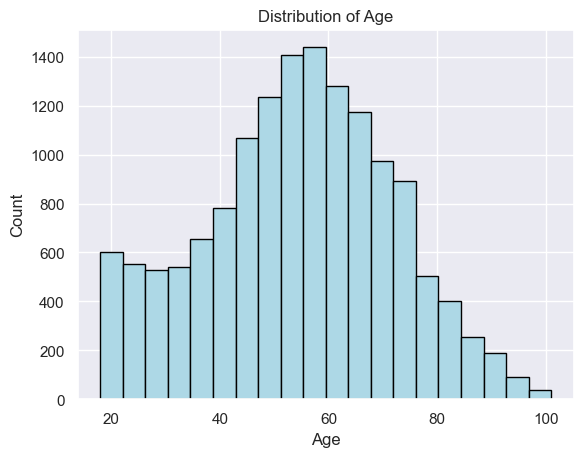

In [116]:
# plot the distribution of age
plt.hist(profile_df_copy['age'], bins=20, color='lightBlue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [117]:
profile_df_copy['cluster'].value_counts()

cluster
0    5631
1    4734
2    4248
Name: count, dtype: int64

In [118]:
profile_df_copy.head()

,gender,age,income,transaction_frequency,average_transaction_amount,click_rate,completion_rate,cluster,offer_received_A,offer_received_B,...,offer_completed_A,offer_completed_B,offer_completed_C,offer_completed_D,offer_completed_E,offer_completed_F,offer_completed_G,offer_completed_H,offer_completed_I,offer_completed_J
0,1.0,55,112000.0,3.0,25.670000,0.000000,0.500000,2,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1.0,75,100000.0,7.0,22.752857,1.000000,0.750000,0,1,0,...,1,0,0,1,0,0,0,0,1,0
2,0.0,68,70000.0,3.0,19.243333,0.750000,0.500000,1,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.0,65,53000.0,3.0,12.143333,1.000000,0.833333,1,0,0,...,0,0,0,1,0,0,1,0,2,1
4,0.0,58,51000.0,4.0,3.905000,0.666667,0.333333,2,0,0,...,0,0,0,0,0,0,1,0,0,0


In [119]:
# Calculate centroids
centroids = profile_df_copy.groupby('cluster').mean()

In [120]:
centroids

,gender,age,income,transaction_frequency,average_transaction_amount,click_rate,completion_rate,offer_received_A,offer_received_B,offer_received_C,...,offer_completed_A,offer_completed_B,offer_completed_C,offer_completed_D,offer_completed_E,offer_completed_F,offer_completed_G,offer_completed_H,offer_completed_I,offer_completed_J
cluster,,,,,,,,,,,,,,,,,,,,,
0,1.000000,56.892026,69317.350382,8.394779,17.724532,0.792482,0.576789,0.454626,0.462085,0.431007,...,0.310602,0.297460,0.0,0.328183,0.274907,0.375955,0.374711,0.0,0.322145,0.305097
1,0.000000,53.543726,65659.907055,10.266582,17.038879,0.855411,0.664090,0.476341,0.460076,0.363329,...,0.335234,0.294888,0.0,0.361005,0.304394,0.463033,0.490494,0.0,0.386565,0.356147
2,0.117232,52.028249,60040.489642,6.191855,8.823556,0.582870,0.168848,0.417844,0.409840,0.568267,...,0.061676,0.045669,0.0,0.131121,0.078625,0.120056,0.118879,0.0,0.092279,0.105226


In [121]:
from sklearn.preprocessing import LabelEncoder

# List all possible offer aliases as you expect them to appear after stripping prefixes
all_possible_offers = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']  # Adjust according to your actual offer labels

def cumulative_random_offer(row):
    # For the 10 columns in the row, find the top 3 based on value
    # and make these entrie as one and remaining as zero
    # For all zero, keep them as zeros
    print(type(row))
    # values = row.values
    # sorted_indices = np.argsort(values)
    # We are interested in the top 3 values; argsort returns indices for ascending order, so we take the last three
    # top_indices = sorted_indices[-3:]
    # Create a new row with all zeros
    new_row = np.zeros_like(values)
    # Set the top three indices to 1
    # new_row[top_indices] = 1
    return new_row

In [122]:
profile_df_copy.head()[completed_columns]

,offer_completed_A,offer_completed_B,offer_completed_C,offer_completed_D,offer_completed_E,offer_completed_F,offer_completed_G,offer_completed_H,offer_completed_I,offer_completed_J
0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,0
3,0,0,0,1,0,0,1,0,2,1
4,0,0,0,0,0,0,1,0,0,0


In [123]:
profile_df_copy.head()[completed_columns].apply(cumulative_random_offer, axis=1)

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


0    [, , , , , , , , , , , , , , , , , , , , , , ,...
1    [, , , , , , , , , , , , , , , , , , , , , , ,...
2    [, , , , , , , , , , , , , , , , , , , , , , ,...
3    [, , , , , , , , , , , , , , , , , , , , , , ,...
4    [, , , , , , , , , , , , , , , , , , , , , , ,...
dtype: object

In [124]:
# # Apply this method
# profile_df_copy['most_completed_offer'] = profile_df_copy[completed_columns].apply(cumulative_random_offer, axis=1).str.replace('offer_completed_', '')

# label_encoder = LabelEncoder()
# profile_df_copy['most_completed_offer'] = label_encoder.fit_transform(profile_df_copy['most_completed_offer'])

# # Check the distribution again
# print(profile_df_copy['most_completed_offer'].value_counts())
# print(label_encoder.classes_)  # Check the mapped classes

In [125]:
profile_df_copy_next = profile_df_copy.copy()

In [126]:
profile_df_copy = profile_df_copy_next.copy()

In [127]:
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder

# # Example offers
# all_possible_offers = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']  # Adjust according to your offers

# # Convert to categorical with all possible categories
# profile_df_copy['most_completed_offer'] = pd.Categorical(profile_df_copy['most_completed_offer'],
#                                                          categories=all_possible_offers,
#                                                          ordered=True)

# # Now encode with LabelEncoder
# label_encoder = LabelEncoder()
# profile_df_copy['most_completed_offer'] = label_encoder.fit_transform(profile_df_copy['most_completed_offer'])

# # Check the distribution of labels
# print(profile_df_copy['most_completed_offer'].value_counts())


In [128]:
profile_df_copy.head()

,gender,age,income,transaction_frequency,average_transaction_amount,click_rate,completion_rate,cluster,offer_received_A,offer_received_B,...,offer_completed_A,offer_completed_B,offer_completed_C,offer_completed_D,offer_completed_E,offer_completed_F,offer_completed_G,offer_completed_H,offer_completed_I,offer_completed_J
0,1.0,55,112000.0,3.0,25.670000,0.000000,0.500000,2,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1.0,75,100000.0,7.0,22.752857,1.000000,0.750000,0,1,0,...,1,0,0,1,0,0,0,0,1,0
2,0.0,68,70000.0,3.0,19.243333,0.750000,0.500000,1,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.0,65,53000.0,3.0,12.143333,1.000000,0.833333,1,0,0,...,0,0,0,1,0,0,1,0,2,1
4,0.0,58,51000.0,4.0,3.905000,0.666667,0.333333,2,0,0,...,0,0,0,0,0,0,1,0,0,0


In [129]:
from sklearn.preprocessing import OneHotEncoder

# Assume df is your dataframe
encoder = OneHotEncoder(sparse_output=False)  # Use sparse_output instead of sparse
cluster_encoded = encoder.fit_transform(profile_df_copy[['cluster']])

# Create a DataFrame with encoded features and concatenate it to the original DataFrame
columns = [f'cluster_{int(i)}' for i in range(cluster_encoded.shape[1])]  # Adjust column names
cluster_encoded_df = pd.DataFrame(cluster_encoded, columns=columns, index=profile_df_copy.index)
profile_df_copy = pd.concat([profile_df_copy.drop(['cluster'], axis=1), cluster_encoded_df], axis=1)


In [130]:
profile_df_copy.head()

,gender,age,income,transaction_frequency,average_transaction_amount,click_rate,completion_rate,offer_received_A,offer_received_B,offer_received_C,...,offer_completed_D,offer_completed_E,offer_completed_F,offer_completed_G,offer_completed_H,offer_completed_I,offer_completed_J,cluster_0,cluster_1,cluster_2
0,1.0,55,112000.0,3.0,25.670000,0.000000,0.500000,0,0,1,...,1,0,0,0,0,0,0,0.0,0.0,1.0
1,1.0,75,100000.0,7.0,22.752857,1.000000,0.750000,1,0,0,...,1,0,0,0,0,1,0,1.0,0.0,0.0
2,0.0,68,70000.0,3.0,19.243333,0.750000,0.500000,0,0,1,...,1,0,0,1,0,0,0,0.0,1.0,0.0
3,0.0,65,53000.0,3.0,12.143333,1.000000,0.833333,0,0,0,...,1,0,0,1,0,2,1,0.0,1.0,0.0
4,0.0,58,51000.0,4.0,3.905000,0.666667,0.333333,0,0,1,...,0,0,0,1,0,0,0,0.0,0.0,1.0


In [131]:
profile_df_copy_test = profile_df_copy.copy()

In [132]:
profile_df_copy = profile_df_copy_test.copy()

In [133]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
columns_to_scale = ['age', 'gender', 'income', 'transaction_frequency', 'average_transaction_amount','offer_received_A', 'offer_received_B', 'offer_received_C',
       'offer_received_D', 'offer_received_E', 'offer_received_F',
       'offer_received_G', 'offer_received_H', 'offer_received_I',
       'offer_received_J', 'offer_viewed_A', 'offer_viewed_B',
       'offer_viewed_C', 'offer_viewed_D', 'offer_viewed_E', 'offer_viewed_F',
       'offer_viewed_G', 'offer_viewed_H', 'offer_viewed_I', 'offer_viewed_J',
       'offer_completed_A', 'offer_completed_B', 'offer_completed_C',
       'offer_completed_D', 'offer_completed_E', 'offer_completed_F',
       'offer_completed_G', 'offer_completed_H', 'offer_completed_I',
       'offer_completed_J']

profile_df_copy[columns_to_scale] = scaler.fit_transform(profile_df_copy[columns_to_scale])

In [134]:
profile_df_copy

,gender,age,income,transaction_frequency,average_transaction_amount,click_rate,completion_rate,offer_received_A,offer_received_B,offer_received_C,...,offer_completed_D,offer_completed_E,offer_completed_F,offer_completed_G,offer_completed_H,offer_completed_I,offer_completed_J,cluster_0,cluster_1,cluster_2
0,1.0,0.445783,0.911111,0.083333,0.056859,0.000000,0.500000,0.00,0.00,0.25,...,0.25,0.0,0.00,0.00,0.0,0.000000,0.00,0.0,0.0,1.0
1,1.0,0.686747,0.777778,0.194444,0.050397,1.000000,0.750000,0.25,0.00,0.00,...,0.25,0.0,0.00,0.00,0.0,0.333333,0.00,1.0,0.0,0.0
2,0.0,0.602410,0.444444,0.083333,0.042624,0.750000,0.500000,0.00,0.00,0.25,...,0.25,0.0,0.00,0.25,0.0,0.000000,0.00,0.0,1.0,0.0
3,0.0,0.566265,0.255556,0.083333,0.026897,1.000000,0.833333,0.00,0.00,0.00,...,0.25,0.0,0.00,0.25,0.0,0.666667,0.25,0.0,1.0,0.0
4,0.0,0.481928,0.233333,0.111111,0.008650,0.666667,0.333333,0.00,0.00,0.25,...,0.00,0.0,0.00,0.25,0.0,0.000000,0.00,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14608,1.0,0.325301,0.266667,0.194444,0.006338,1.000000,0.000000,0.00,0.25,0.00,...,0.00,0.0,0.00,0.00,0.0,0.000000,0.00,1.0,0.0,0.0
14609,0.0,0.518072,0.466667,0.194444,0.008218,0.333333,0.333333,0.00,0.00,0.25,...,0.25,0.0,0.00,0.00,0.0,0.000000,0.00,0.0,0.0,1.0
14610,0.0,0.373494,0.477778,0.222222,0.011003,0.333333,0.000000,0.00,0.00,0.25,...,0.00,0.0,0.00,0.00,0.0,0.000000,0.00,0.0,0.0,1.0
14611,1.0,0.783133,0.222222,0.388889,0.030008,1.000000,1.000000,0.25,0.25,0.00,...,0.25,0.0,0.00,0.00,0.0,0.000000,0.00,1.0,0.0,0.0


In [135]:
df = profile_df_copy

# Assuming offer_received_X and offer_completed_X columns follow a consistent naming convention
offer_types = ['A','B','C','D','E','F','G','H','I','J']

# Calculate total offers completed for each offer type
for offer in offer_types:
    if f'offer_completed_{offer}' in df.columns and f'offer_received_{offer}' in df.columns:
        df[f'total_completed_{offer}'] = df[f'offer_completed_{offer}'] + df[f'offer_received_{offer}']
    else:
        df[f'total_completed_{offer}'] = 0


# Identify the offer with the highest completion count
df['most_completed_offer'] = df[[f'total_completed_{offer}' for offer in offer_types]].idxmax(axis=1)

# Convert the offer names from 'total_completed_X' to just 'X'
df['most_completed_offer'] = df['most_completed_offer'].str.extract('(\w)$')


# Create one-hot encoding for the most completed offer
one_hot = pd.get_dummies(df['most_completed_offer'], prefix='most_completed_offer')

# Convert Boolean to integers (0, 1)
one_hot = one_hot.applymap(int)

df = pd.concat([df, one_hot], axis=1)


C:\Users\asus\AppData\Local\Temp\ipykernel_155020\3359290194.py:25: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  one_hot = one_hot.applymap(int)


In [136]:
df.tail(500)

,gender,age,income,transaction_frequency,average_transaction_amount,click_rate,completion_rate,offer_received_A,offer_received_B,offer_received_C,...,most_completed_offer_A,most_completed_offer_B,most_completed_offer_C,most_completed_offer_D,most_completed_offer_E,most_completed_offer_F,most_completed_offer_G,most_completed_offer_H,most_completed_offer_I,most_completed_offer_J
14113,0.0,0.361446,0.066667,0.138889,0.003402,0.800000,0.000000,0.00,0.00,0.00,...,0,0,0,1,0,0,0,0,0,0
14114,1.0,0.602410,0.477778,0.361111,0.045561,1.000000,0.200000,0.00,0.25,0.50,...,0,0,1,0,0,0,0,0,0,0
14115,1.0,0.469880,0.722222,0.277778,0.058104,0.333333,0.833333,0.25,0.00,0.00,...,0,0,0,0,1,0,0,0,0,0
14116,1.0,0.542169,0.900000,0.055556,0.052683,0.600000,0.600000,0.25,0.00,0.00,...,0,0,0,0,1,0,0,0,0,0
14117,1.0,0.807229,0.522222,0.111111,0.039765,0.500000,0.750000,0.00,0.75,0.00,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14608,1.0,0.325301,0.266667,0.194444,0.006338,1.000000,0.000000,0.00,0.25,0.00,...,0,1,0,0,0,0,0,0,0,0
14609,0.0,0.518072,0.466667,0.194444,0.008218,0.333333,0.333333,0.00,0.00,0.25,...,0,0,0,1,0,0,0,0,0,0
14610,0.0,0.373494,0.477778,0.222222,0.011003,0.333333,0.000000,0.00,0.00,0.25,...,0,0,1,0,0,0,0,0,0,0
14611,1.0,0.783133,0.222222,0.388889,0.030008,1.000000,1.000000,0.25,0.25,0.00,...,1,0,0,0,0,0,0,0,0,0


In [137]:
df.columns

Index(['gender', 'age', 'income', 'transaction_frequency',
       'average_transaction_amount', 'click_rate', 'completion_rate',
       'offer_received_A', 'offer_received_B', 'offer_received_C',
       'offer_received_D', 'offer_received_E', 'offer_received_F',
       'offer_received_G', 'offer_received_H', 'offer_received_I',
       'offer_received_J', 'offer_viewed_A', 'offer_viewed_B',
       'offer_viewed_C', 'offer_viewed_D', 'offer_viewed_E', 'offer_viewed_F',
       'offer_viewed_G', 'offer_viewed_H', 'offer_viewed_I', 'offer_viewed_J',
       'offer_completed_A', 'offer_completed_B', 'offer_completed_C',
       'offer_completed_D', 'offer_completed_E', 'offer_completed_F',
       'offer_completed_G', 'offer_completed_H', 'offer_completed_I',
       'offer_completed_J', 'cluster_0', 'cluster_1', 'cluster_2',
       'total_completed_A', 'total_completed_B', 'total_completed_C',
       'total_completed_D', 'total_completed_E', 'total_completed_F',
       'total_completed_G', 'tot

Classifier model


In [138]:
# split data into train test

X = df.drop(['offer_received_A', 'offer_received_B', 'offer_received_C',
       'offer_received_D', 'offer_received_E', 'offer_received_F',
       'offer_received_G', 'offer_received_H', 'offer_received_I',
       'offer_received_J', 'offer_completed_A', 'offer_completed_B', 'offer_completed_C',
       'offer_completed_D', 'offer_completed_E', 'offer_completed_F',
       'offer_completed_G', 'offer_completed_H', 'offer_completed_I',
       'offer_completed_J','total_completed_A', 'total_completed_B', 'total_completed_C',
       'total_completed_D', 'total_completed_E', 'total_completed_F',
       'total_completed_G', 'total_completed_H', 'total_completed_I',
       'total_completed_J', 'most_completed_offer', 'most_completed_offer_A',
       'most_completed_offer_B', 'most_completed_offer_C',
       'most_completed_offer_D', 'most_completed_offer_E',
       'most_completed_offer_F', 'most_completed_offer_G',
       'most_completed_offer_H', 'most_completed_offer_I',
       'most_completed_offer_J'],axis=1)

Y = df[['most_completed_offer_A',
       'most_completed_offer_B', 'most_completed_offer_C',
       'most_completed_offer_D', 'most_completed_offer_E',
       'most_completed_offer_F', 'most_completed_offer_G',
       'most_completed_offer_H', 'most_completed_offer_I',
       'most_completed_offer_J']]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)



In [139]:
print("X columns", X_train.columns)
print("Y columns", y_train.columns)

X columns Index(['gender', 'age', 'income', 'transaction_frequency',
       'average_transaction_amount', 'click_rate', 'completion_rate',
       'offer_viewed_A', 'offer_viewed_B', 'offer_viewed_C', 'offer_viewed_D',
       'offer_viewed_E', 'offer_viewed_F', 'offer_viewed_G', 'offer_viewed_H',
       'offer_viewed_I', 'offer_viewed_J', 'cluster_0', 'cluster_1',
       'cluster_2'],
      dtype='object')
Y columns Index(['most_completed_offer_A', 'most_completed_offer_B',
       'most_completed_offer_C', 'most_completed_offer_D',
       'most_completed_offer_E', 'most_completed_offer_F',
       'most_completed_offer_G', 'most_completed_offer_H',
       'most_completed_offer_I', 'most_completed_offer_J'],
      dtype='object')


In [140]:
nan_exists = df.isna().any().any()
print("Are there any NaN values in the DataFrame?", nan_exists)

# Check for NaN values in each column
nan_columns = df.isna().any()
print("NaN values in each column:")
print(nan_columns)

Are there any NaN values in the DataFrame? False
NaN values in each column:
gender                        False
age                           False
income                        False
transaction_frequency         False
average_transaction_amount    False
                              ...  
most_completed_offer_F        False
most_completed_offer_G        False
most_completed_offer_H        False
most_completed_offer_I        False
most_completed_offer_J        False
Length: 61, dtype: bool


In [141]:
# Assuming 'df' is your DataFrame and it includes the target columns as 'most_completed_offer_X'
target_columns = [
    'most_completed_offer_A', 'most_completed_offer_B', 'most_completed_offer_C',
    'most_completed_offer_D', 'most_completed_offer_E', 'most_completed_offer_F',
    'most_completed_offer_G', 'most_completed_offer_H', 'most_completed_offer_I',
    'most_completed_offer_J'
]

# Calculate the sum of target columns for each row
df['label_sum'] = df[target_columns].sum(axis=1)

# Check if there are any rows with more than one '1' in the target columns
multilabel_count = (df['label_sum'] > 1).sum()
print(f"Number of multilabel instances: {multilabel_count}")

# Determine if the dataset is multiclass or multilabel
if multilabel_count > 0:
    print("This is a multilabel classification task.")
else:
    print("This is a multiclass classification task.")


Number of multilabel instances: 0
This is a multiclass classification task.


In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize and train a RandomForestClassifier
classifier = RandomForestClassifier(max_depth= 20, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200, max_features = None)
classifier.fit(X_train, y_train)

# Predicting the test set results
y_pred = classifier.predict(X_test)

# Calculating the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the RandomForest model: {accuracy:.2%}")

Accuracy of the RandomForest model: 60.69%


F1 score for class 1: 0.77
F1 score for class 2: 0.77
F1 score for class 3: 0.44
F1 score for class 4: 0.49
F1 score for class 5: 0.53
F1 score for class 6: 0.77
F1 score for class 7: 0.81
F1 score for class 8: 0.77
F1 score for class 9: 0.75
F1 score for class 10: 0.53


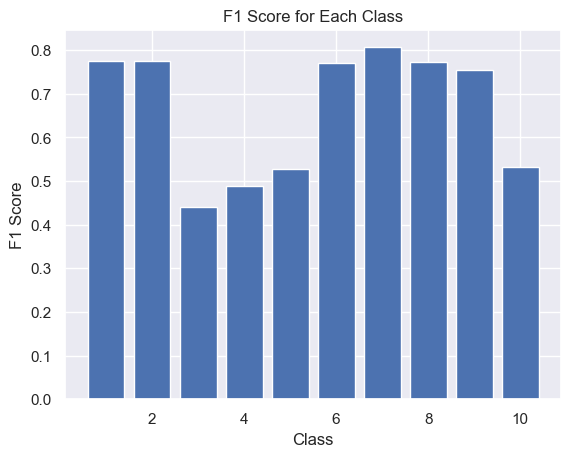

In [143]:
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

# Calculate F1 score for each class
f1_scores = f1_score(y_test, y_pred, average=None)

# Print the F1 score for each class
for i, score in enumerate(f1_scores, start=1):
    print(f"F1 score for class {i}: {score:.2f}")

# Plotting the F1 scores
plt.bar(range(1, len(f1_scores)+1), f1_scores)
plt.xlabel('Class')
plt.ylabel('F1 Score')
plt.title('F1 Score for Each Class')
plt.show()


In [144]:
y_train_pred = classifier.predict(X_train)

In [145]:
y_df = pd.DataFrame(y_pred)
y_train_df = pd.DataFrame(y_train_pred)

In [146]:
import numpy as np
import matplotlib.pyplot as plt

# Perform argmax on each row
argmax_values_y = np.argmax(y_df.values, axis=1)
argmax_values_y_train = np.argmax(y_train_df.values, axis=1)




In [147]:
result_df = pd.DataFrame(argmax_values_y)
result_df_train = pd.DataFrame(argmax_values_y_train)

In [148]:
print("train",result_df_train.value_counts())

train 0
0    2168
8    1864
4    1667
1    1305
5    1194
3    1128
6     982
9     667
2     512
7     203
Name: count, dtype: int64


In [149]:
print("test",result_df.value_counts())

test 0
0    1068
8     438
1     311
5     271
4     266
6     220
3     154
9      91
2      58
7      46
Name: count, dtype: int64


In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Define the parameter grid
param_grid = {
    'n_estimators': [10,100, 200],
    'max_features':  ['sqrt', 'log2', None],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the classifier
rf = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy',return_train_score=True)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)


Fitting 3 folds for each of 243 candidates, totalling 729 fits


Best parameters: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best accuracy: 0.5986312809815093


In [151]:
from xgboost import XGBClassifier

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [10, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}

# Initialize the XGBoost classifier
xgb = XGBClassifier(random_state=42)

# Set up GridSearchCV for XGBoost
grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=3, n_jobs=-1, verbose=2, scoring='accuracy', return_train_score=True)

# Fit GridSearchCV for XGBoost
grid_search_xgb.fit(X_train, y_train)

# Print the best parameters and the best score for XGBoost
print("Best parameters:", grid_search_xgb.best_params_)
print("Best accuracy:", grid_search_xgb.best_score_)


Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 1.0}
Best accuracy: 0.6068433623716237


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


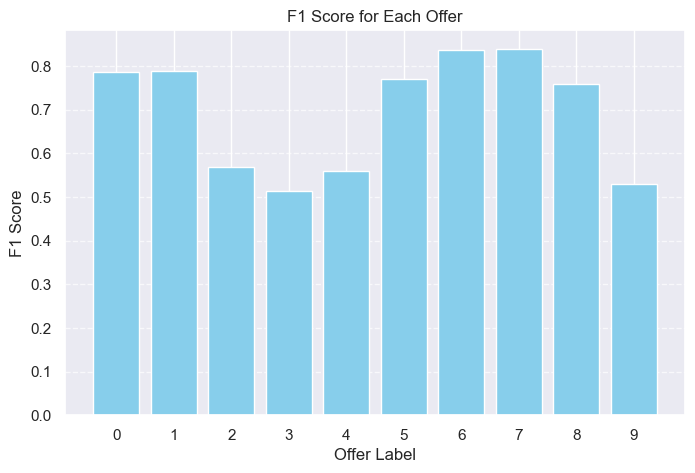

In [152]:
from sklearn.metrics import classification_report

# Get the best model from the grid search
best_xgb_model = grid_search_xgb.best_estimator_

# Make predictions on the test set
y_pred = best_xgb_model.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Extract F1 scores for each class
f1_scores = {int(label): metrics['f1-score'] for label, metrics in report.items() if label.isdigit()}

# Plot the F1 scores
plt.figure(figsize=(8, 5))
plt.bar(f1_scores.keys(), f1_scores.values(), color='skyblue')
plt.xlabel('Offer Label')
plt.ylabel('F1 Score')
plt.title('F1 Score for Each Offer')
plt.xticks(list(f1_scores.keys()))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [153]:
from sklearn.metrics import classification_report

# Get the best model from the grid search
best_xgb_model = grid_search_xgb.best_estimator_

# Make predictions on the test set
y_pred = best_xgb_model.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Extract F1 scores for each class
f1_scores = report['weighted avg']

# Print F1 scores for each class
print("\nF1 Score for Each Class:")
for label, score in f1_scores.items():
    print(f"Class {label}: {score}")


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79       431
           1       0.82      0.76      0.79       350
           2       0.81      0.44      0.57       137
           3       0.74      0.39      0.51       324
           4       0.75      0.45      0.56       431
           5       0.82      0.72      0.77       298
           6       0.90      0.78      0.84       271
           7       0.85      0.83      0.84        60
           8       0.71      0.81      0.76       430
           9       0.84      0.39      0.53       191

   micro avg       0.80      0.64      0.71      2923
   macro avg       0.81      0.63      0.70      2923
weighted avg       0.80      0.64      0.70      2923
 samples avg       0.63      0.64      0.63      2923


F1 Score for Each Class:
Class precision: 0.7963981107034029
Class recall: 0.6387273349298666
Class f1-score: 0.6960197404778998
Class support: 2923.0


c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


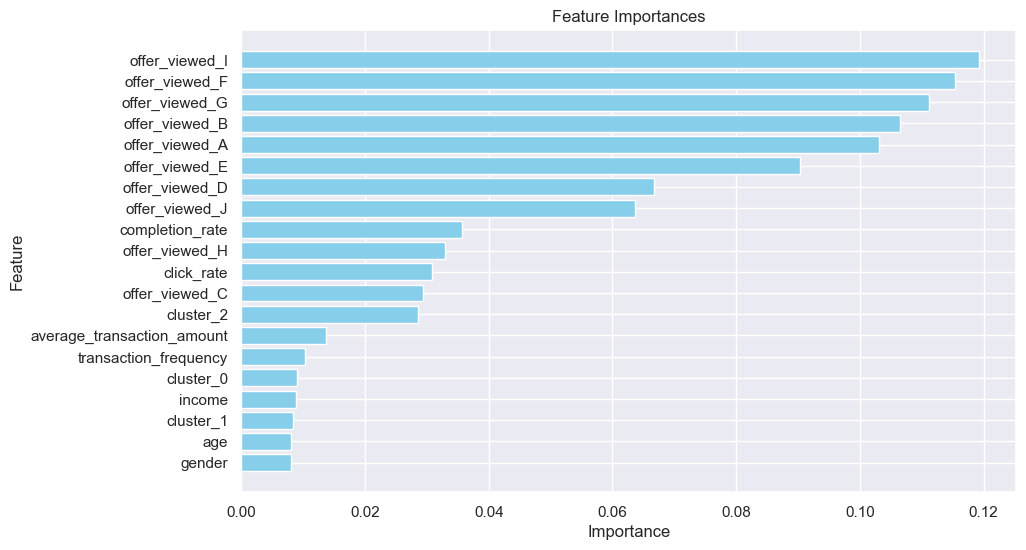

In [154]:
# Get feature importances
feature_importances = best_xgb_model.feature_importances_

# Create a DataFrame to store feature names and importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()


In [155]:
# import xgboost as xgb
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split

# # Initialize XGBoost classifier
# xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# # Fit the classifier to the training set
# xgb_clf.fit(X_train, y_train)

# # Predict the labels of the test set
# y_pred = xgb_clf.predict(X_test)

# # Calculate the accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy: {:.4f}".format(accuracy))


In [156]:

# # Define parameter grid
# param_grid = {
#     'n_estimators': [10, 100, 200, 500],
#     'max_depth': [1, 3, 6, 10, 20],
#     'learning_rate': [0.01, 0.1, 0.3],
#     'subsample': [0.8, 1, 10],
#     'colsample_bytree': [0.8, 1, 10],
# }

# # Grid search for best parameters
# grid_search = GridSearchCV(
#     estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
#     param_grid=param_grid,
#     scoring='accuracy',
#     cv=3,
#     verbose=2,
#     n_jobs=-1
# )
# grid_search.fit(X_train, y_train)

# # Print best parameters and best score
# print("Best parameters:", grid_search.best_params_)
# print("Best cross-validation score: {:.4f}".format(grid_search.best_score_))


In [157]:
# # Initialize XGBoost classifier with the best parameters from grid search
# best_params = {
#     'n_estimators':500,  # replace with your best params
#     'max_depth': 5,      # replace with your best params
#     'min_samples_split': 2, # replace with your best params
#     'learning_rate': 0.01,  # replace with your best params
#     'subsample': 0.8,        # replace with your best params
#     'colsample_bytree': 0.8, # replace with your best params
#     'eval_metric': 'mlogloss'
# }
# xgb_clf = xgb.XGBClassifier(**best_params)

# # Fit the classifier to the training set and evaluate on the test set
# xgb_clf.fit(
#     X_train, 
#     y_train, 
#     eval_set=[(X_train, y_train), (X_test, y_test)], 
#     verbose=True
# )

# # Retrieve performance metrics
# results = xgb_clf.evals_result()
# epochs = len(results['validation_0']['mlogloss'])
# x_axis = range(0, epochs)

# # Plot log loss
# fig, ax = plt.subplots()
# ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
# ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
# ax.legend()
# plt.ylabel('Log Loss')
# plt.title('XGBoost Log Loss')
# plt.show()


In [158]:
# # calculate accuracy on train and test dataset using the best XGboost model

# # Initialize XGBoost classifier with the best parameters found from grid search
# xgb_clf_best = xgb.XGBClassifier(
#     n_estimators=best_params['n_estimators'], 
#     max_depth=best_params['max_depth'], 
#     learning_rate=best_params['learning_rate'],
#     subsample=best_params['subsample'], 
#     colsample_bytree=best_params['colsample_bytree'],
#     use_label_encoder=False,
#     eval_metric='mlogloss',
#     random_state=42
# )

# # Fit the classifier to the training set
# xgb_clf_best.fit(X_train, y_train)

# # Predictions for the training set
# y_train_pred = xgb_clf_best.predict(X_train)
# # Predictions for the test set
# y_test_pred = xgb_clf_best.predict(X_test)

# # Calculate accuracy on the training set
# train_accuracy = accuracy_score(y_train, y_train_pred)
# print("Training set accuracy: {:.4f}".format(train_accuracy))

# # Calculate accuracy on the test set
# test_accuracy = accuracy_score(y_test, y_test_pred)
# print("Test set accuracy: {:.4f}".format(test_accuracy))

# NN

In [159]:
# ## build a neural network using pytorch for buiilding a classifier to train for the offers

# import torch
# import torch.nn as nn
# import torch.nn.functional as F
# from torch.utils.data import TensorDataset, DataLoader
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler

In [160]:
# X_train

In [161]:
# df = profile_df_copy.copy()

In [162]:
# # Define columns that you want to standardize
# numerical_cols = ['age', 'income', 'transaction_frequency', 'average_transaction_amount', 'click_rate', 'completion_rate']

# # Initialize the StandardScaler
# scaler = StandardScaler()

# # Fit and transform the data
# df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# # Assuming df is your DataFrame and 'most_completed_offer' is your target variable
# X = df.drop('most_completed_offer', axis=1).values
# y = df['most_completed_offer'].values

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [163]:
# # Convert the data to PyTorch tensors
# X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
# y_train_tensor = torch.tensor(y_train, dtype=torch.long)
# X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
# y_test_tensor = torch.tensor(y_test, dtype=torch.long)


In [164]:
# # Create TensorDatasets and DataLoaders
# train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
# test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
# train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [165]:
# # Define the neural network model
# class OfferClassifier(nn.Module):
#     def __init__(self):
#         super(OfferClassifier, self).__init__()
#         self.fc1 = nn.Linear(X_train.shape[1], 128)
#         self.fc2 = nn.Linear(128, 64)
#         self.fc3 = nn.Linear(64, len(torch.unique(y_train_tensor)))

#     def forward(self, x):
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x


In [166]:
# # Initialize the model
# model = OfferClassifier()

# # Define the loss function and optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)


In [167]:

# # Training the model
# epochs = 10
# for epoch in range(epochs):
#     model.train()
#     running_loss = 0.0
#     for inputs, labels in train_loader:
#         optimizer.zero_grad()
#         outputs = model(inputs)
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()
#         running_loss += loss.item()
#     model.eval()
#     with torch.no_grad():
#         train_accuracy = calculate_accuracy(model(X_train_tensor), y_train_tensor)
#         test_accuracy = calculate_accuracy(model(X_test_tensor), y_test_tensor)
#     print(f'Epoch {epoch+1}/{epochs} - Loss: {running_loss/len(train_loader):.4f}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}')

In [168]:
# import pandas as pd

# # Assuming 'profile_df_copy' is your original DataFrame and it contains the 'most_completed_offer' column
# # Convert 'most_completed_offer' into one-hot encoding
# offer_dummies = pd.get_dummies(profile_df_copy['most_completed_offer'], prefix='offer')

# # Convert boolean to binary (True to 1 and False to 0)
# offer_dummies = offer_dummies.astype(int)

# # Concatenate the new columns back to the original DataFrame
# profile_df_copy = pd.concat([profile_df_copy.drop('most_completed_offer', axis=1), offer_dummies], axis=1)

# # Now profile_df_copy has the one-hot encoded features for 'most_completed_offer' with binary values
# profile_df_copy.head()

In [169]:

# # Columns that you want to normalize
# numerical_cols = ['age', 'income', 'transaction_frequency', 'average_transaction_amount', 'click_rate', 'completion_rate']
# # Assuming profile_df_copy is your DataFrame

# # Get all column names from the DataFrame
# all_columns = profile_df_copy.columns

# # Filter columns that start with the desired prefixes
# offer_received_cols = [col for col in all_columns if col.startswith('offer_received_')]
# offer_viewed_cols = [col for col in all_columns if col.startswith('offer_viewed_')]
# offer_completed_cols = [col for col in all_columns if col.startswith('offer_completed_')]

# # Extend the numerical_cols list with these columns
# numerical_cols.extend(offer_received_cols)
# numerical_cols.extend(offer_viewed_cols)
# numerical_cols.extend(offer_completed_cols)

# # Now numerical_cols contains all the desired columns
# # You can proceed with normalization as before
# scaler = MinMaxScaler()
# profile_df_copy[numerical_cols] = scaler.fit_transform(profile_df_copy[numerical_cols])

In [170]:
# profile_df_copy = profile_df_copy.drop(['level_0'],axis= 1)

In [171]:
# # Features and target
# X = profile_df_copy.drop(['offer_0', 'offer_1', 'offer_2', 'offer_3', 'offer_4', 'offer_5', 'offer_6', 'offer_7', 'offer_8', 'offer_9','offer_completed_A','offer_completed_B','offer_completed_C','offer_completed_D','offer_completed_E','offer_completed_F','offer_completed_G','offer_completed_H','offer_completed_I','offer_completed_J'], axis=1)
# y = profile_df_copy[['offer_0', 'offer_1', 'offer_2', 'offer_3', 'offer_4', 'offer_5', 'offer_6', 'offer_7', 'offer_8', 'offer_9']].values

# # Convert target to a multi-class single label if necessary (as RandomForest doesn't natively support multi-label)
# y_single_label = np.argmax(y, axis=1)

# # Split the data
# X_train, X_test, y_train, y_test = train_test_split(X, y_single_label, test_size=0.2, random_state=42)
